# PROPERATI 2.0

Dada mi incorporacion reciente a la empresa Properati, se me pidio que creara un modelo de Machine Learning el cual prediga de forma correcta los precios de las propiedades en venta.

Mi primer modelo fue aprobado en la forma que se me pidio: Trabajar sobre los datos obtenidos, hacer una exploracion de datos mas profunda para obtener asi, mejores datos para alimentar al nuevo modelo.

*PARA REALIZAR LA TAREA ENCOMENDADA PRETENDO DIVIDIR MI TRABAJO DE LA SIGUIENTE MANERA:*

                                             - PARTE A -

**TRANSFORMACION DE DATOS**

* Exploracion de los datos. Estudiar su comportamiento, distribuciones y sus (cor)relaciones.

* Pre-procesamiento de los datos. Trabajar sobre los valores *atipicos* y *faltantes*. Tratarlos e imputarlos con los nuevos metodos aprendidos.

* Aplicacion de *Encoders* a las variables categoricas, utilizando asi la mayor informacion disponible para el modelo.
  
* Escalado de datos. 

* Aplicar tecnicas de generacion de nuevas variables predictoras y/o reduccion de dimensionalidad dando paso asi a un mejor y mas completo DataFrame para el modelo. 

* Repetir el primer paso, explorar los datos otra ves una ves *limpios* de sus valores atipicos y faltantes y con sus datos propiamente escalados.

* Habiendo terminado con las transformacion de datos, doy paso a explorar las variables sobre las que el modelo sera entrando.

**MACHINE LEARNING**

* Se me pidio que: Entre el mismo modelo usado en *Proyecto 1 (KNeighborsRegressor)* y , dado esta nueva exploracion de datos, compare su desempeño con las exploracion de datos anterior.

                                             - PARTE B -    
* **Modeloz Avanzados**

* Aplicar *modelos avanzados* sobre el nuevo Dataframe. Los modelos elegidos son:
                                                    
                         _ Regresion Lineal con atributos polinomicos
                         _ Decision Tree Regressor
                         _ XGBoost Regressor
                         _ Random Forest Regressor

* Entrenar los modelos. Comparar sus desempeños. Aplircar Validacion Cruzada y GridSearchCV para mejorar sus rendimientos. Volver a comparar sus desempeños. Ultima evaluacion de desempeño de los nuevos modelos sobre el modelo del *Proyecto 1*

* Eleccion del mejor modelo

                                             - PARTE C -
                                             
* Una vez terminado con el entrenamiento, evaluacion y eleccion del nuevo modelo se me pidio que responda una (o todas) las 
  preguntas que se encuentran en un cuestionario enviado por el Director del departamento de Data Science.

<h1><center>PARTE -A-</center></h1> 


***LIBRERIAS***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

sns.set(style='darkgrid')

***IMPORTACION Y EXPLORACION***

In [2]:
df= pd.read_csv("C:/Users/milto/Data Science/Bloque 2/2_ Protecto Integrador 2/DS_Proyecto_01_Datos_Properati.csv")

In [3]:
df.shape

(146660, 19)

In [4]:
df.describe()

lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.000000        47.000000  1.110000e+05  
50%         1.000000      78.000000        68.000000  1.660000e+05  
75%         2.000000     140.000000       108.000000  2.650000e+05  
max        14.000000  193549.000000    126062.000000  3.243423e+07

In [160]:
df.count()

l2                 144302
l3                 144302
rooms              144302
bedrooms           144302
bathrooms          138378
surface_total      124041
surface_covered    122963
price              144302
property_type      144302
dtype: int64

In [6]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [7]:
df.bathrooms.value_counts()

1.0     82982
2.0     39068
3.0     13058
4.0      3949
5.0      1167
6.0       316
7.0       107
8.0        17
10.0       12
9.0        10
11.0        8
14.0        6
13.0        2
12.0        1
Name: bathrooms, dtype: int64

In [8]:
df.surface_total.value_counts()

50.0       2587
60.0       2174
42.0       2142
70.0       2109
45.0       2081
           ... 
22577.0       1
2100.0        1
9530.0        1
1912.0        1
4152.0        1
Name: surface_total, Length: 1843, dtype: int64

In [9]:
df.surface_covered.value_counts()

40.0       3284
50.0       2881
60.0       2874
70.0       2618
42.0       2508
           ... 
4685.0        1
11098.0       1
532.0         1
5780.0        1
691.0         1
Name: surface_covered, Length: 876, dtype: int64

In [10]:
df.price.value_counts()

120000.0    2353
110000.0    2114
125000.0    2042
115000.0    1985
130000.0    1976
            ... 
156350.0       1
213300.0       1
368693.0       1
156313.0       1
393254.0       1
Name: price, Length: 6821, dtype: int64

In [11]:
df.operation_type.value_counts()

Venta    146660
Name: operation_type, dtype: int64

**QUITANDO FILAS DUPLICADAS DEL DATASET**

In [12]:
df[df.duplicated()]

start_date    end_date  created_on        lat        lon         l1  \
7       2019-10-17  2019-10-31  2019-10-17 -34.600988 -58.433061  Argentina   
9       2019-10-17  2019-12-23  2019-10-17 -34.639598 -58.419612  Argentina   
40      2019-10-17  2019-10-22  2019-10-17 -34.597613 -58.416688  Argentina   
48      2019-10-17  2019-10-27  2019-10-17 -34.597613 -58.416688  Argentina   
51      2019-10-17  2019-11-15  2019-10-17 -34.577746 -58.431085  Argentina   
...            ...         ...         ...        ...        ...        ...   
146412  2019-07-31  2019-08-14  2019-07-31 -34.653769 -58.533948  Argentina   
146497  2019-07-31  2019-09-04  2019-07-31        NaN        NaN  Argentina   
146546  2019-07-31  2020-01-17  2019-07-31        NaN        NaN  Argentina   
146571  2019-07-31  2019-08-14  2019-07-31        NaN        NaN  Argentina   
146578  2019-07-31  2019-08-14  2019-07-31        NaN        NaN  Argentina   

                              l2                l3  rooms  bedrooms  \
7                Capital Federal      Villa Crespo    2.0       1.0   
9                Capital Federal  Parque Patricios    1.0       1.0   
40               Capital Federal           Palermo    2.0       1.0   
48               Capital Federal           Palermo    2.0       1.0   
51               Capital Federal           Palermo    2.0       1.0   
...                          ...               ...    ...       ...   
146412  Bs.As. G.B.A. Zona Oeste        La Matanza    2.0       1.0   
146497           Capital Federal           Palermo    2.0       1.0   
146546           Capital Federal           Palermo    3.0       2.0   
146571  Bs.As. G.B.A. Zona Norte             Tigre    2.0       1.0   
146578  Bs.As. G.B.A. Zona Norte             Tigre    3.0       2.0   

        bathrooms  surface_total  surface_covered     price currency  \
7             1.0           70.0             70.0  159500.0      USD   
9             1.0           45.0             37.0   89000.0      USD   
40            1.0           49.0             41.0  169000.0      USD   
48            1.0           49.0             41.0  169000.0      USD   
51            1.0           46.0             40.0  145000.0      USD   
...           ...            ...              ...       ...      ...   
146412        1.0           82.0             40.0   85000.0      USD   
146497        1.0           62.0             58.0  168000.0      USD   
146546        2.0           89.0             82.0  434999.0      USD   
146571        2.0           57.0             46.0  120000.0      USD   
146578        2.0           89.0             71.0  167000.0      USD   

                                                    title  \
7       Depto.tipo casa de 2 ambientes en Venta en Vil...   
9       PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...   
40      Oportunidad - CON COCHERA !! Excelente ubicaci...   
48      Oportunidad - CON COCHERA !! Excelente ubicaci...   
51      U$S 145.000 - 2 amb en Duplex - Palermo - Char...   
...                                                   ...   
146412  Venta Dpto 2 Ambientes A Estrenar con Terraza ...   
146497  VENTA LANZAMIENTO - DOS AMBIENTES - PALERMO HO...   
146546            Quo Palermo 3 amb a la venta a estrenar   
146571  VENTA - DEPARTAMENTO 2 AMBIENTES - CONTRAFRENT...   
146578  VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...   

                                              description property_type  \
7       Muy lindo PH, con terraza propia, 96m2! por es...            PH   
9       VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...            PH   
40      Para Visitarlo contactarse al 01161534481 Mart...  Departamento   
48      Para Visitarlo contactarse al 01161534481 Mart...  Departamento   
51      Charcas 5200Palermo2 ambientes en Dúplex.45.68...  Departamento   
...                                                   ...           ...   
146412  ** SE VENDE **Luminoso y ventilado departament...  Departamento   
146497  

In [13]:
df= df.drop_duplicates()

In [14]:
df.count()

start_date         144302
end_date           144302
created_on         144302
lat                134730
lon                134696
l1                 144302
l2                 144302
l3                 144302
rooms              144302
bedrooms           144302
bathrooms          138378
surface_total      124041
surface_covered    122963
price              144302
currency           144302
title              144302
description        144302
property_type      144302
operation_type     144302
dtype: int64

*En una observacion sobre como se distribuyen las variables, sus valores y su relevancia ante la problematica, se puede apreciar que las variables `start_date`, `end_date`, `created_on`, `lat`, `lon`, `currency`, `title`, `description`, `operation_type` y `l1` proveen poca (o muy poca) inormacion para mi trabajo. Por esto voy a quitar estar variables y dedicarlo tiempo a las demas.*

In [16]:
df.drop(columns= ["start_date", "end_date", "created_on", 
                  "lat", "lon", "currency", 
                  "title", "description", "operation_type", "l1"], inplace=True)

**INSTANCIANDO POR TIPO DE PROPIEDAD**

In [17]:
df.property_type.value_counts()

Departamento       105276
Casa                21443
PH                  14103
Lote                 1308
Oficina               635
Otro                  374
Local comercial       325
Casa de campo         314
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [18]:
mask = df[df.property_type == "Departamento"]
mask1 = df[df.property_type == "Casa"]
mask2 = df[df.property_type == "PH"]

df1= pd.concat([mask, mask1, mask2])

In [19]:
print("Dataset con todas las propiedades: ", df.shape)
print("Dataset con propieades del tipo : 'Departamento','Casa','PH' ", df1.shape)

Dataset con todas las propiedades:  (144302, 9)
Dataset con propieades del tipo : 'Departamento','Casa','PH'  (140822, 9)


Como simplemente estaria precindiendo de un *-2,34%-* de los datos, por seguir la practicidad de la simpleza y ,tambien, trabajar con el mismo tipo de propiedades que en *Proyecto 1* voy a seguir trabajando con **df1** de aqui en adelante.

In [15]:
#sns.pairplot(df1, hue="property_type")

**CREO VARIAS COPIAS DEL DATAFRAME**

In [20]:
 df2, df3, df4, df5, df6, df7 = df1.copy(), df1.copy(), df1.copy(), df1.copy(), df1.copy(), df1.copy()

**DESCOMPRIMENDO DATASET POR "TIPO DE PROPIEDAD"**

Ya que estoy intentando crear un Modelo de Machine Learning el cual pueda predecir de la forma mas precisa el *precio* de una propiedad X. 

Ya que analizando previamente mis mayores objetos de estudios en cuanto a "tipo de propiedad" son - CASA, DEPARTAMENTO y PH- para generar un analizis *mas profundo* de Outliers, me parece una buena practica instanciar cada Dataframe creado en 3 subsets diferenciados por los "tipos de propiedad"

In [21]:
df2_dpto= df2[df2["property_type"] == "Departamento"]
df2_casa= df2[df2["property_type"] == "Casa"]
df2_ph= df2[df2["property_type"] == "PH"]

df3_dpto= df3[df3["property_type"] == "Departamento"]
df3_casa= df3[df3["property_type"] == "Casa"]
df3_ph= df3[df3["property_type"] == "PH"]

df4_dpto= df4[df4["property_type"] == "Departamento"]
df4_casa= df4[df4["property_type"] == "Casa"]
df4_ph= df4[df4["property_type"] == "PH"]

<h3><center>VALORES ATIPICOS</center></h3> 


* En la siguiente seccion pretendo observar la distribucion de los Valores Atipicos, explorarlos y eliminarlos (tanto a travez de Metodos como tambien *a mano*.

In [22]:
Gs= gs.GridSpec(3,2)

In [23]:
def boxplot(df):
    
    Gs= gs.GridSpec(3,2)
    
    plt.figure(figsize=(40,40))


    ax1= plt.subplot(Gs[0])


    sns.boxplot(data= df, x= "rooms", y = "property_type")
    plt.xticks(fontsize= 23)
    plt.yticks(fontsize=26)
    plt.ylabel("")
    plt.xlabel("Cantidad de Habitaciones", fontsize= 30)
    plt.title("Valores Atipicos en 'Habitaciones'", fontsize= 45, color= 'g')
    
    ax2= plt.subplot(Gs[1])
    
    sns.boxplot(data= df, x= "bedrooms", y = "property_type")
    plt.xticks(fontsize= 23)
    plt.yticks(fontsize=26)
    plt.ylabel("")
    plt.xlabel("Cantidad de Dormitorios", fontsize= 30)
    plt.title("Valores Atipicos en 'Dormitorios'", fontsize= 45, color= 'g')
    
    ax2= plt.subplot(Gs[2])

    sns.boxplot(data= df, x= "bathrooms", y = "property_type")
    plt.xticks(fontsize= 23)
    plt.yticks(fontsize= 26)
    plt.ylabel("")
    plt.xlabel("Cantidad de Baños", fontsize= 30)
    plt.title("\n Valores Atipicos en 'Baños'", fontsize= 45, color= 'g')

    ax3= plt.subplot(Gs[3])

    sns.boxplot(data= df, x= "surface_total", y = "property_type")
    plt.xticks(fontsize= 23)
    plt.yticks(fontsize= 26)
    plt.ylabel("")
    plt.xlabel("Superficie Total en metros", fontsize= 30)
    ax3.set_xlim([0, 25000])
    plt.title("\n Valores Atipicos en 'Superficie Total'", fontsize= 45, color= 'g')

    ax4= plt.subplot(Gs[4])

    sns.boxplot(data= df, x= "surface_covered", y = "property_type")
    plt.xticks(fontsize= 23)
    plt.yticks(fontsize= 26)
    plt.ylabel("")
    plt.xlabel("Superficie Cubierta en metros", fontsize= 30)
    ax4.set_xlim([0, 20000])
    plt.title("\n Valores Atipicos en 'Superficie Cubierta'", fontsize= 45, color= 'g')

    ax5= plt.subplot(Gs[5])

    sns.boxplot(data= df, x= "price", y = "property_type")
    plt.xticks(fontsize= 23)
    plt.yticks(fontsize= 26)
    plt.ylabel("")
    plt.xlabel("Precios de las propiedades", fontsize= 30)
    ax5.set_xlim([0, 1100000])
    plt.title("\n Valores Atipicos en 'Precio'", fontsize= 45, color= 'g')

    plt.show()

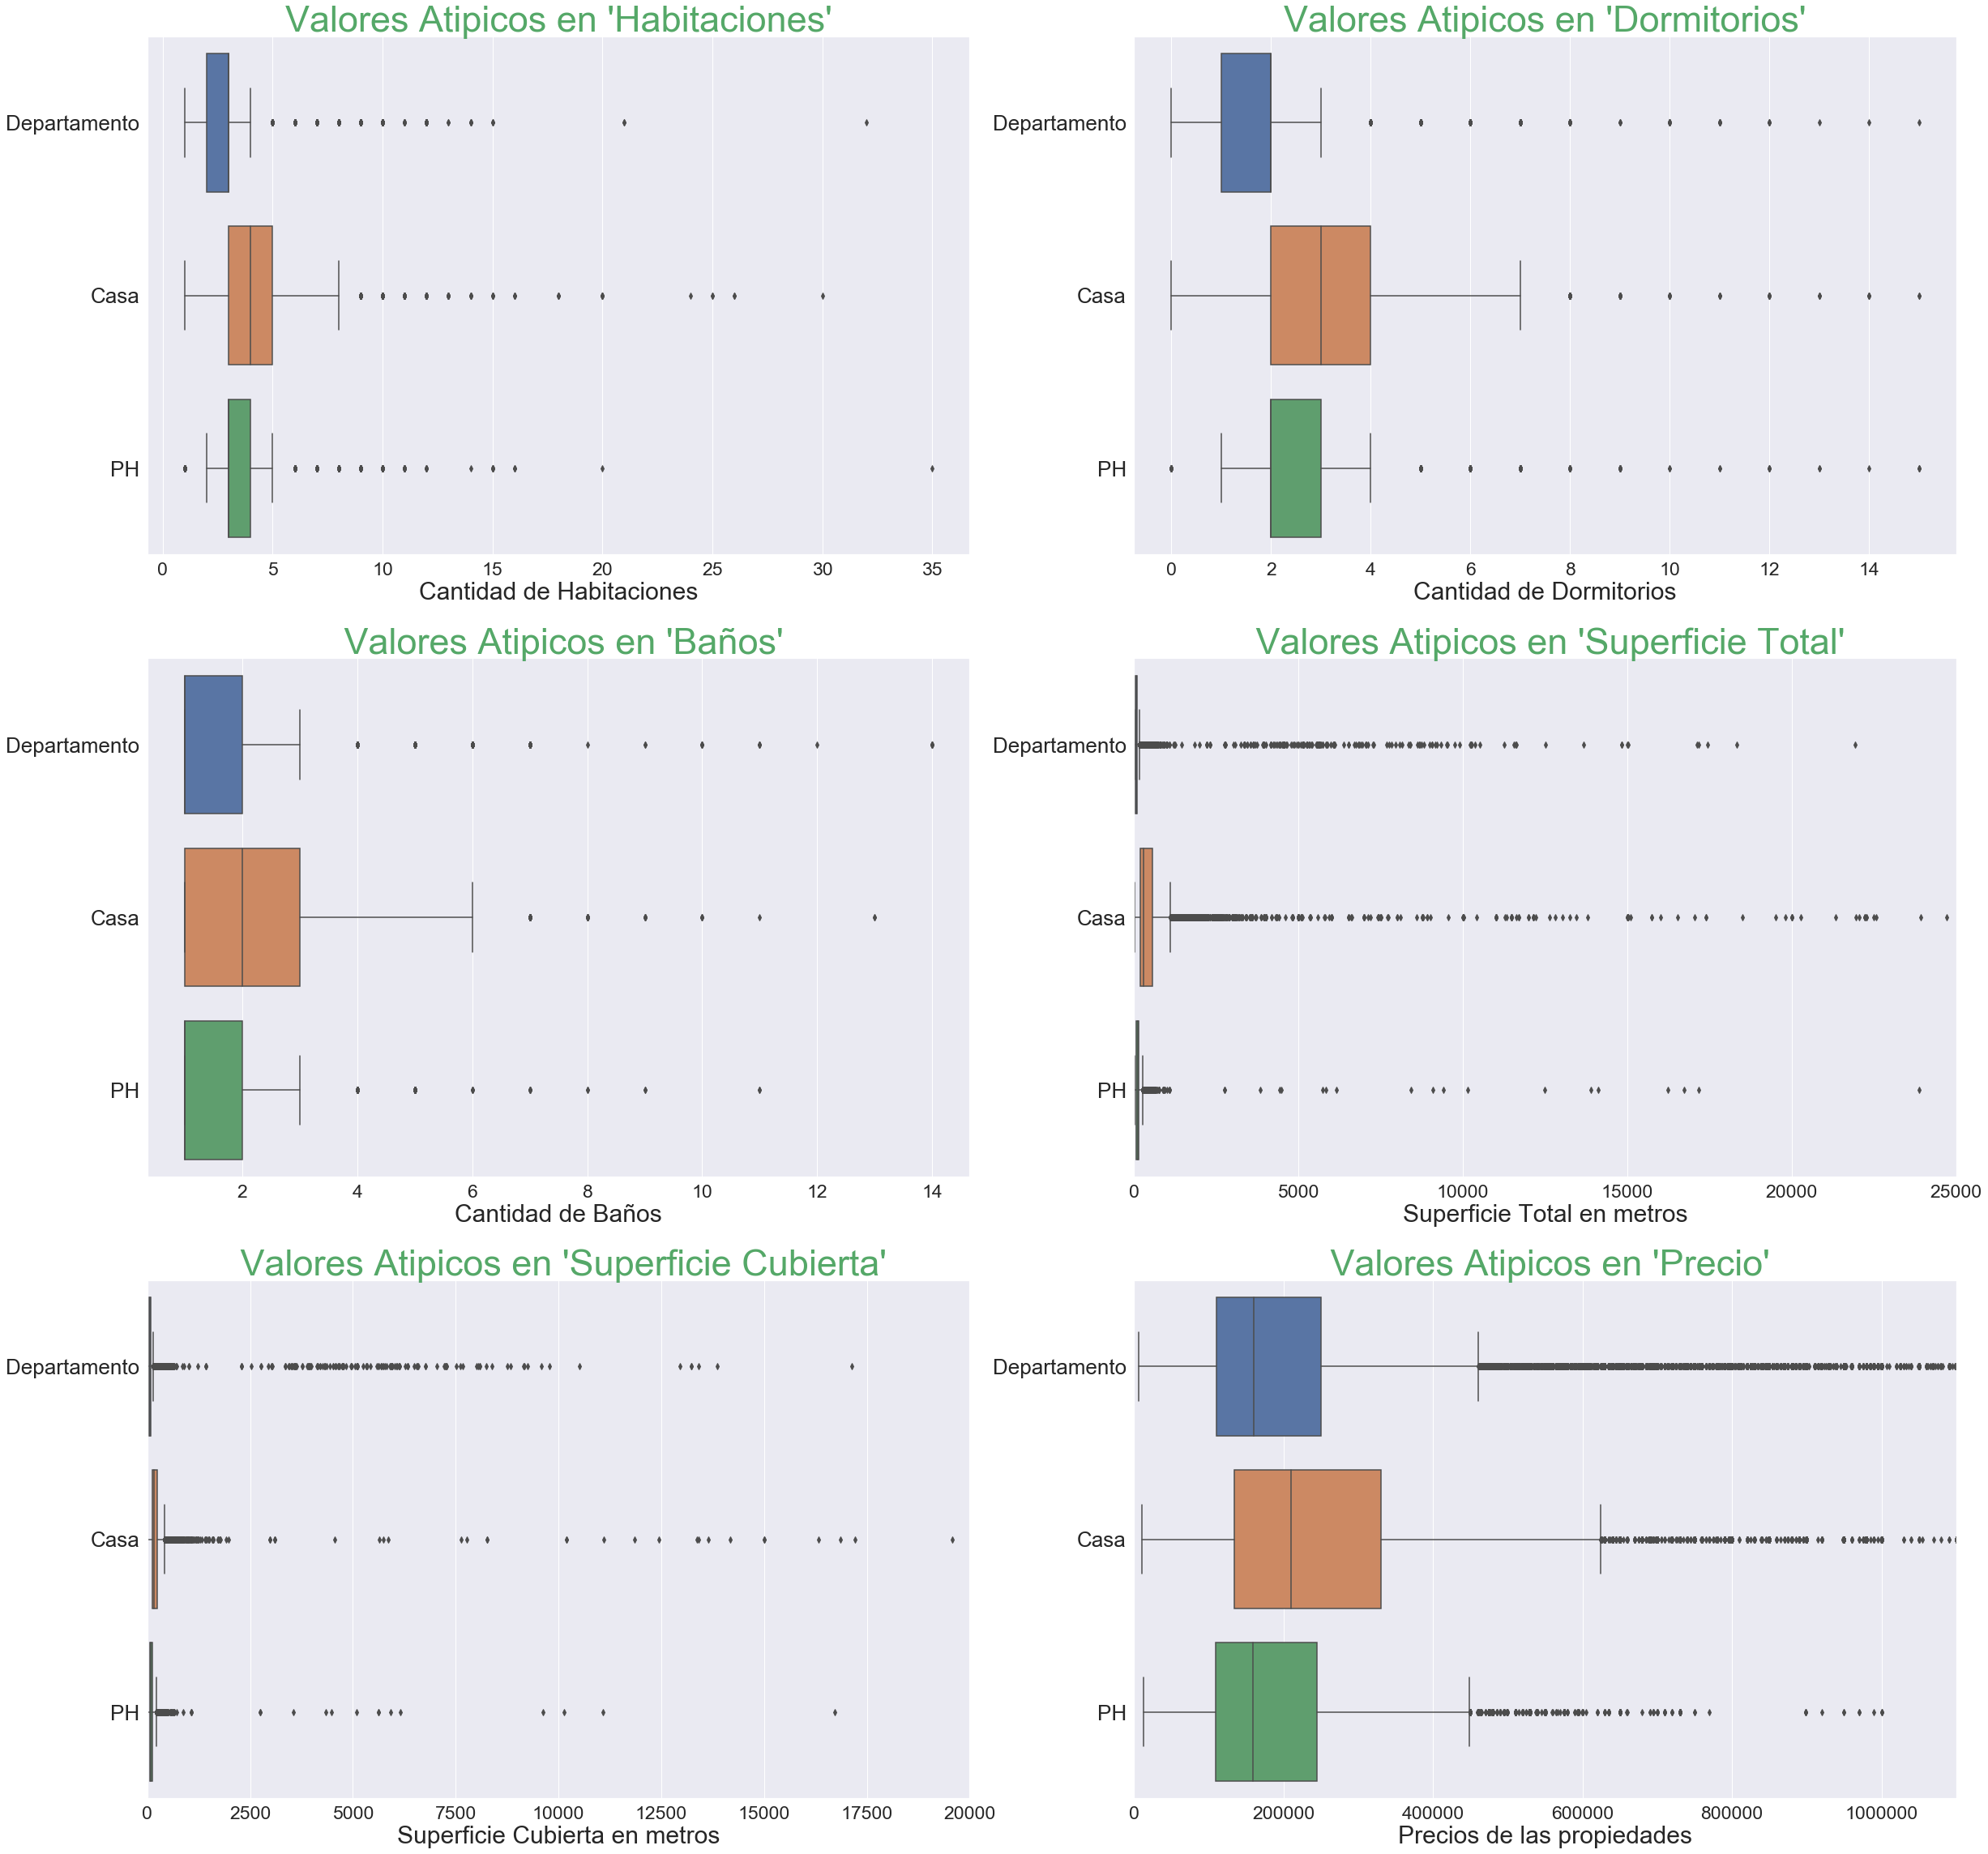

In [24]:
boxplot(df1)

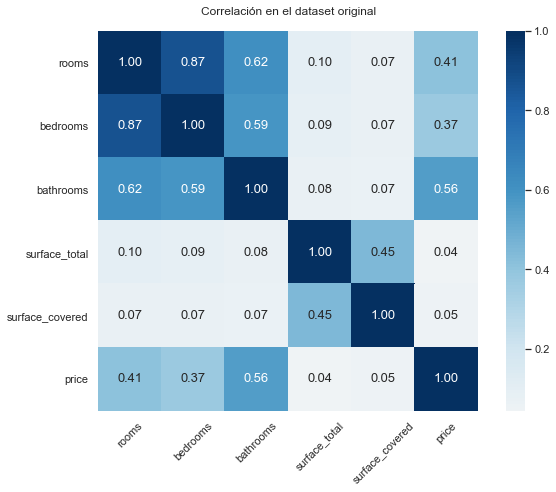

In [25]:
plt.figure(figsize=(9, 7))

corr = df1.corr()

sns.heatmap(data = corr, cbar=True, square=True, annot=True, 
            fmt= '.2f', annot_kws={'size': 13}, 
            xticklabels= corr.columns, yticklabels= corr.columns, 
            cmap='RdBu', center=0)
plt.title('Correlación en el dataset original', pad=16)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

<h6><center>ATIPICOS CON METODOS</center></h6> 

**OBTENIENDO RESULTADOS DE Q1-Q3-IQR... UMBRAL MINIMO-UMBRAL MAXIMO-...ETC**

* Defino funciones para calcular **IQR** y **3-Simgas** para observar *relativamente* donde es que se encuentran los datos y por donde se identifican a los atipicos.

In [26]:
def iqr_calc(df,var):
    
    q25 = np.nanquantile(df[var], 0.25)
    q75 = np.nanquantile(df[var], 0.75)
    iqr = q75 - q25
    minimo = q25 - (iqr*1.5)
    maximo = q75 + (iqr*1.5)
    
    return "Q1= "  + str(q25),"Q3= " + str(q75), "IQR= " + str(iqr), "Minimo= " + str(minimo), "Maximo= " + str(maximo)

In [27]:
for var in df1.drop(columns= ["l2","l3","property_type"]):
    print("Valores de IQR para: ", var, iqr_calc(df1,var))    

Valores de IQR para:  rooms ('Q1= 2.0', 'Q3= 4.0', 'IQR= 2.0', 'Minimo= -1.0', 'Maximo= 7.0')
Valores de IQR para:  bedrooms ('Q1= 1.0', 'Q3= 3.0', 'IQR= 2.0', 'Minimo= -2.0', 'Maximo= 6.0')
Valores de IQR para:  bathrooms ('Q1= 1.0', 'Q3= 2.0', 'IQR= 1.0', 'Minimo= -0.5', 'Maximo= 3.5')
Valores de IQR para:  surface_total ('Q1= 52.0', 'Q3= 138.0', 'IQR= 86.0', 'Minimo= -77.0', 'Maximo= 267.0')
Valores de IQR para:  surface_covered ('Q1= 47.0', 'Q3= 108.0', 'IQR= 61.0', 'Minimo= -44.5', 'Maximo= 199.5')
Valores de IQR para:  price ('Q1= 112000.0', 'Q3= 263714.0', 'IQR= 151714.0', 'Minimo= -115571.0', 'Maximo= 491285.0')


In [28]:
def tres_sigma_calc(df, var):
    
    sigma_minimo= df[var].mean() - (3 * df[var].std())
    sigma_maximo= df[var].mean() + (3 * df[var].std())
    
    return "Umbral Minimo: " + str(sigma_minimo), "Umbral Maximo: " + str(sigma_maximo)

In [29]:
for var in df1.drop(columns= ["l2","l3","property_type"]):
    print("Umbrales Maximos y Minomos para: ", var, tres_sigma_calc(df1,var))

Umbrales Maximos y Minomos para:  rooms ('Umbral Minimo: -1.0914895769652788', 'Umbral Maximo: 7.2915151411526935')
Umbrales Maximos y Minomos para:  bedrooms ('Umbral Minimo: -1.3935497115600577', 'Umbral Maximo: 5.39640437915461')
Umbrales Maximos y Minomos para:  bathrooms ('Umbral Minimo: -1.0611251109983095', 'Umbral Maximo: 4.254699466970206')
Umbrales Maximos y Minomos para:  surface_total ('Umbral Minimo: -4162.348446703948', 'Umbral Maximo: 4529.838504113729')
Umbrales Maximos y Minomos para:  surface_covered ('Umbral Minimo: -2667.176524433428', 'Umbral Maximo: 2893.019243134318')
Umbrales Maximos y Minomos para:  price ('Umbral Minimo: -620709.6925778599', 'Umbral Maximo: 1095138.6003479525')


**APLICANDO *IQR* Y *3-SIGMAS* A DATASETS QUE *NO* FUERON INSTANCIADOS POR *TIPO DE PROPIEDAD***

In [30]:
def iqr_remove(df,var):
    
    Q1 = np.nanquantile(df[var], 0.25)
    Q3 = np.nanquantile(df[var], 0.75)
    IQR = Q3 - Q1
    q_min = Q1 - (IQR*1.5)
    q_max = Q3 + (IQR*1.5)
    
    return df[~((df[var] < q_min) | (df[var] > q_max))]

In [31]:
def remove_outliers(df,var):
    
    q1,q3= np.nanpercentile(df[var],[25,75])
    iqr= q3-q1
    l_i= q1-1.5*iqr
    l_s=q3+1.5*iqr
    
    return df[((df[var] > l_i) & (df[var] < l_s))]

In [32]:
def tres_sigmas_remove(df,var):
    
    sigma_minimo= df[var].mean() - (3 * df[var].std())
    sigma_maximo= df[var].mean() + (3 * df[var].std())
    
    return df[~((df[var] < sigma_minimo) | (df[var] > sigma_maximo))]

In [33]:
for var in df2.drop(columns=["l2","l3","property_type"]):
    df2= iqr_remove(df2,var)

In [34]:
for var in df3.drop(columns=["l2","l3","property_type"]):
    df3= remove_outliers(df3,var)

In [35]:
for var in df4.drop(columns=["l2","l3","property_type"]):
    df4= tres_sigmas_remove(df4,var)

In [36]:
print("DataFrame Original (con todas los tipos de propiedad): ", df.shape)
print("DataFrame_1 -Original- con Outliers: ", df1.shape)
print("DataFrame_2 curado de Outliers con Metodo IQR: ", df2.shape)
print("DataFrame_3 curado de Outliers con OTRO Metodo IQR: ", df3.shape)
print("DataFrame_4 Curado con 3-Sigmas: ", df4.shape)

DataFrame Original (con todas los tipos de propiedad):  (144302, 9)
DataFrame_1 -Original- con Outliers:  (140822, 9)
DataFrame_2 curado de Outliers con Metodo IQR:  (112876, 9)
DataFrame_3 curado de Outliers con OTRO Metodo IQR:  (93474, 9)
DataFrame_4 Curado con 3-Sigmas:  (135436, 9)


* Hay un DataFrame el cual devolvio considerablemente MENOS instancias que los otros 2 analizados.

In [37]:
df3.isna().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

Puedo observar que la funcion "outlier_remove" no solo remueve los Outliers sino *tambien* los Valores Faltantes. Esta funcion no sera utilizada de aca en adelante a medida que sigo con la exploracion de Outliers.

Para el proximo analizis de Outliers, voy a trabajar sobre DataFrames separados por tipo de propiedad. Solo voy a trabajar con Dataframe *2* y *4*.

**APLICANDO *IQR* Y *3-SIGMAS* A DATASETS QUE *SI* FUERON INSTANCIADOS POR *TIPO DE PROPIEDAD***

* METODO IQR_1 A UN DATAFRAME INSTANCIADO POR 'TIPO DE PROPIEDADES'

In [38]:
for var in df2_dpto.drop(columns=["l2","l3","property_type"]):
    df2_dpto= iqr_remove(df2_dpto,var)
    
for var in df2_casa.drop(columns=["l2","l3","property_type"]):
    df2_casa= iqr_remove(df2_casa,var)
    
for var in df2_ph.drop(columns=["l2","l3","property_type"]):
    df2_ph= iqr_remove(df2_ph,var)

In [39]:
print("DataFrame_2 -solo departamentos- curado de Outliers: ", df2_dpto.shape)
print("DataFrame_2 -solo casas- curado de Outliers: ", df2_casa.shape)
print("DataFrame_2 -solo ph's- curado de Outliers: ", df2_ph.shape)

DataFrame_2 -solo departamentos- curado de Outliers:  (86946, 9)
DataFrame_2 -solo casas- curado de Outliers:  (18164, 9)
DataFrame_2 -solo ph's- curado de Outliers:  (11848, 9)


In [40]:
df2_inst= pd.concat([df2_dpto, df2_casa, df2_ph])

In [41]:
print("DataFrame Curado de Outliers con metodo IQR_1 instanciados por 'tipo de propiedad':", df2_inst.shape)

DataFrame Curado de Outliers con metodo IQR_1 instanciados por 'tipo de propiedad': (116958, 9)


* METODO 3-SIGMAS A UN DATAFRAME INSTANCIADO POR 'TIPO DE PROPIEDADES'

In [42]:
for var in df4_dpto.drop(columns=["l2","l3","property_type"]):
    df4_dpto= tres_sigmas_remove(df4_dpto,var)
    
for var in df4_casa.drop(columns=["l2","l3","property_type"]):
    df4_casa= tres_sigmas_remove(df4_casa,var)
    
for var in df4_ph.drop(columns=["l2","l3","property_type"]):
    df4_ph= tres_sigmas_remove(df4_ph,var)

In [43]:
print("DataFrame -solo departamentos- curado de Outliers: ", df4_dpto.shape)
print("DataFrame -solo casas- curado de Outliers: ", df4_casa.shape)
print("DataFrame -solo ph's- curado de Outliers: ", df4_ph.shape)

DataFrame -solo departamentos- curado de Outliers:  (99724, 9)
DataFrame -solo casas- curado de Outliers:  (20591, 9)
DataFrame -solo ph's- curado de Outliers:  (13384, 9)


In [44]:
df4_inst= pd.concat([df4_dpto, df4_casa, df4_ph])

In [45]:
print("DataFrame Curado de Outliers con metodo 3-Sigmas instanciados por 'tipo de propiedad':", df4_inst.shape)

DataFrame Curado de Outliers con metodo 3-Sigmas instanciados por 'tipo de propiedad': (133699, 9)


**COMPARACION: METODOS DE CURADO PARA OUTLIERS EN DISTINTOS DATAFRAMES**

In [46]:
print("DataFrame2 curado de Outliers -- Instanciado por 'tipo de propiedad': ", df2_inst.shape ,"-- No-Instanciado : ", df2.shape)
print("DataFrame4 curado de Outliers -- Instanciado por 'tipo de propiedad': ", df4_inst.shape ,"-- No-Instanciado : ", df4.shape)

DataFrame2 curado de Outliers -- Instanciado por 'tipo de propiedad':  (116958, 9) -- No-Instanciado :  (112876, 9)
DataFrame4 curado de Outliers -- Instanciado por 'tipo de propiedad':  (133699, 9) -- No-Instanciado :  (135436, 9)


**BOXPLOTS COMPARATIVOS DE LOS DATAFRAMES INSTANCIADOS Y NO**

* DF2 NO-INSTANCIADO (IQR)

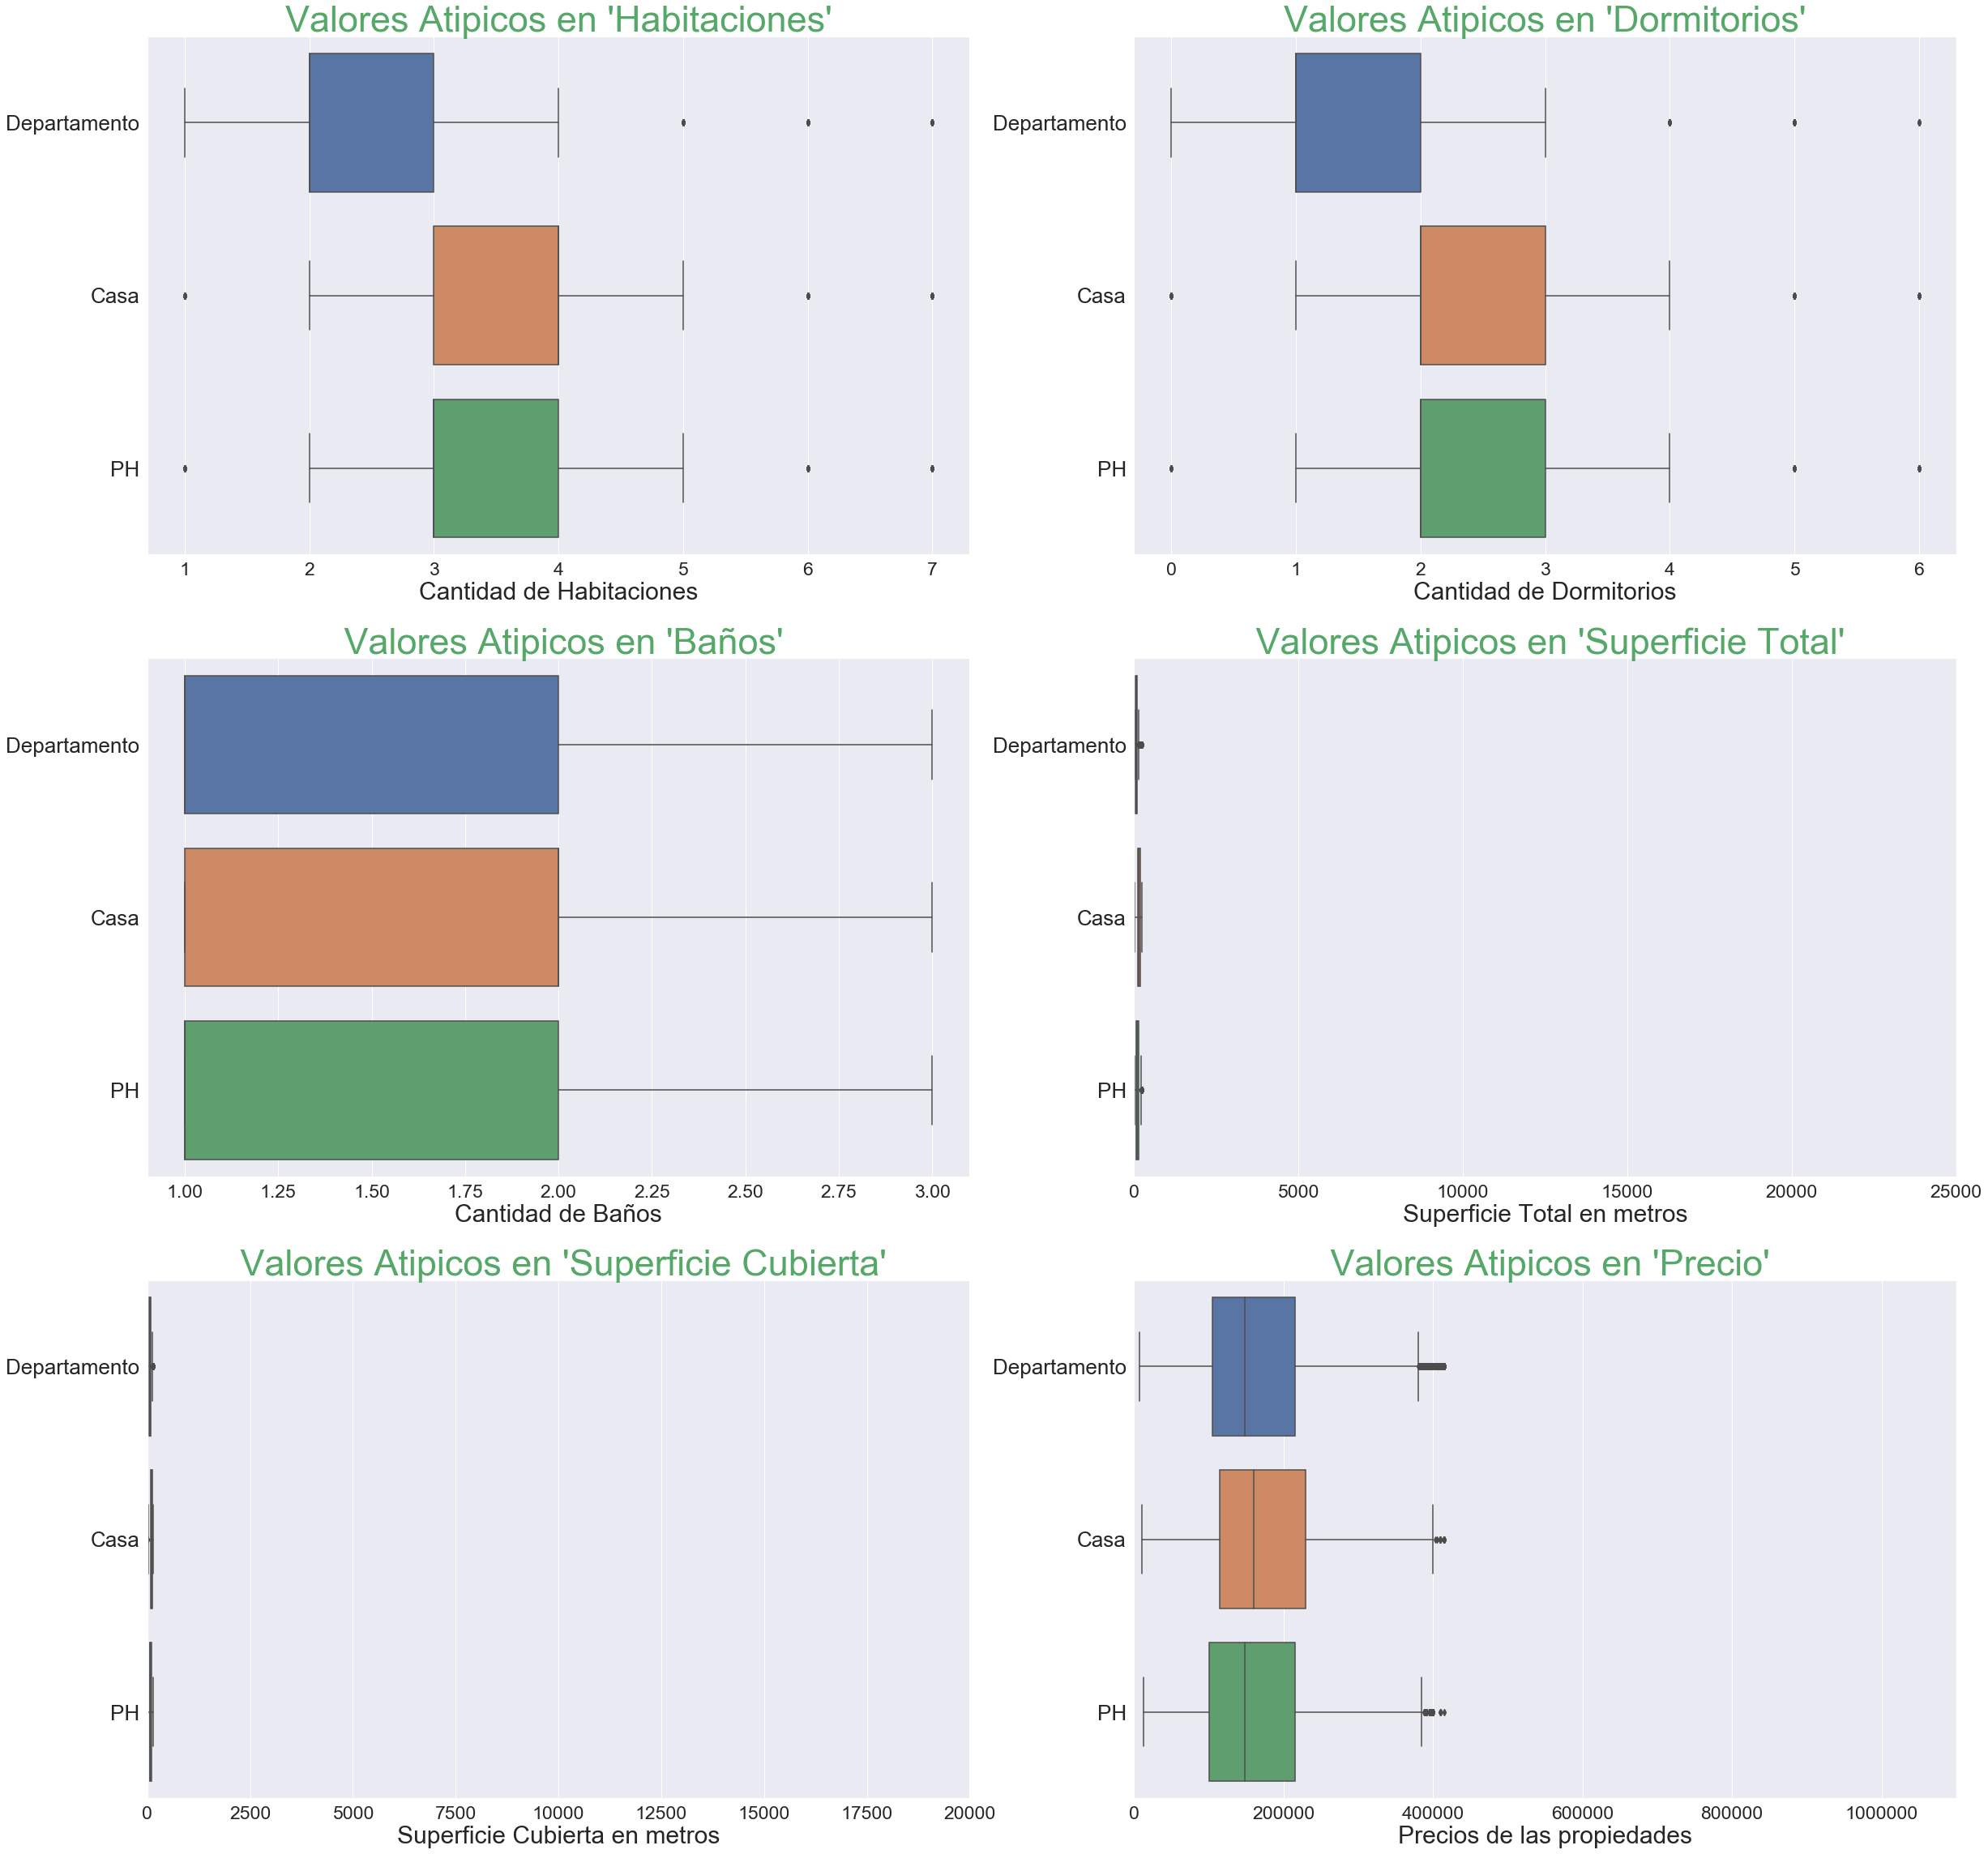

In [47]:
boxplot(df2) 

* DF2 INSTANCIADO (IQR)

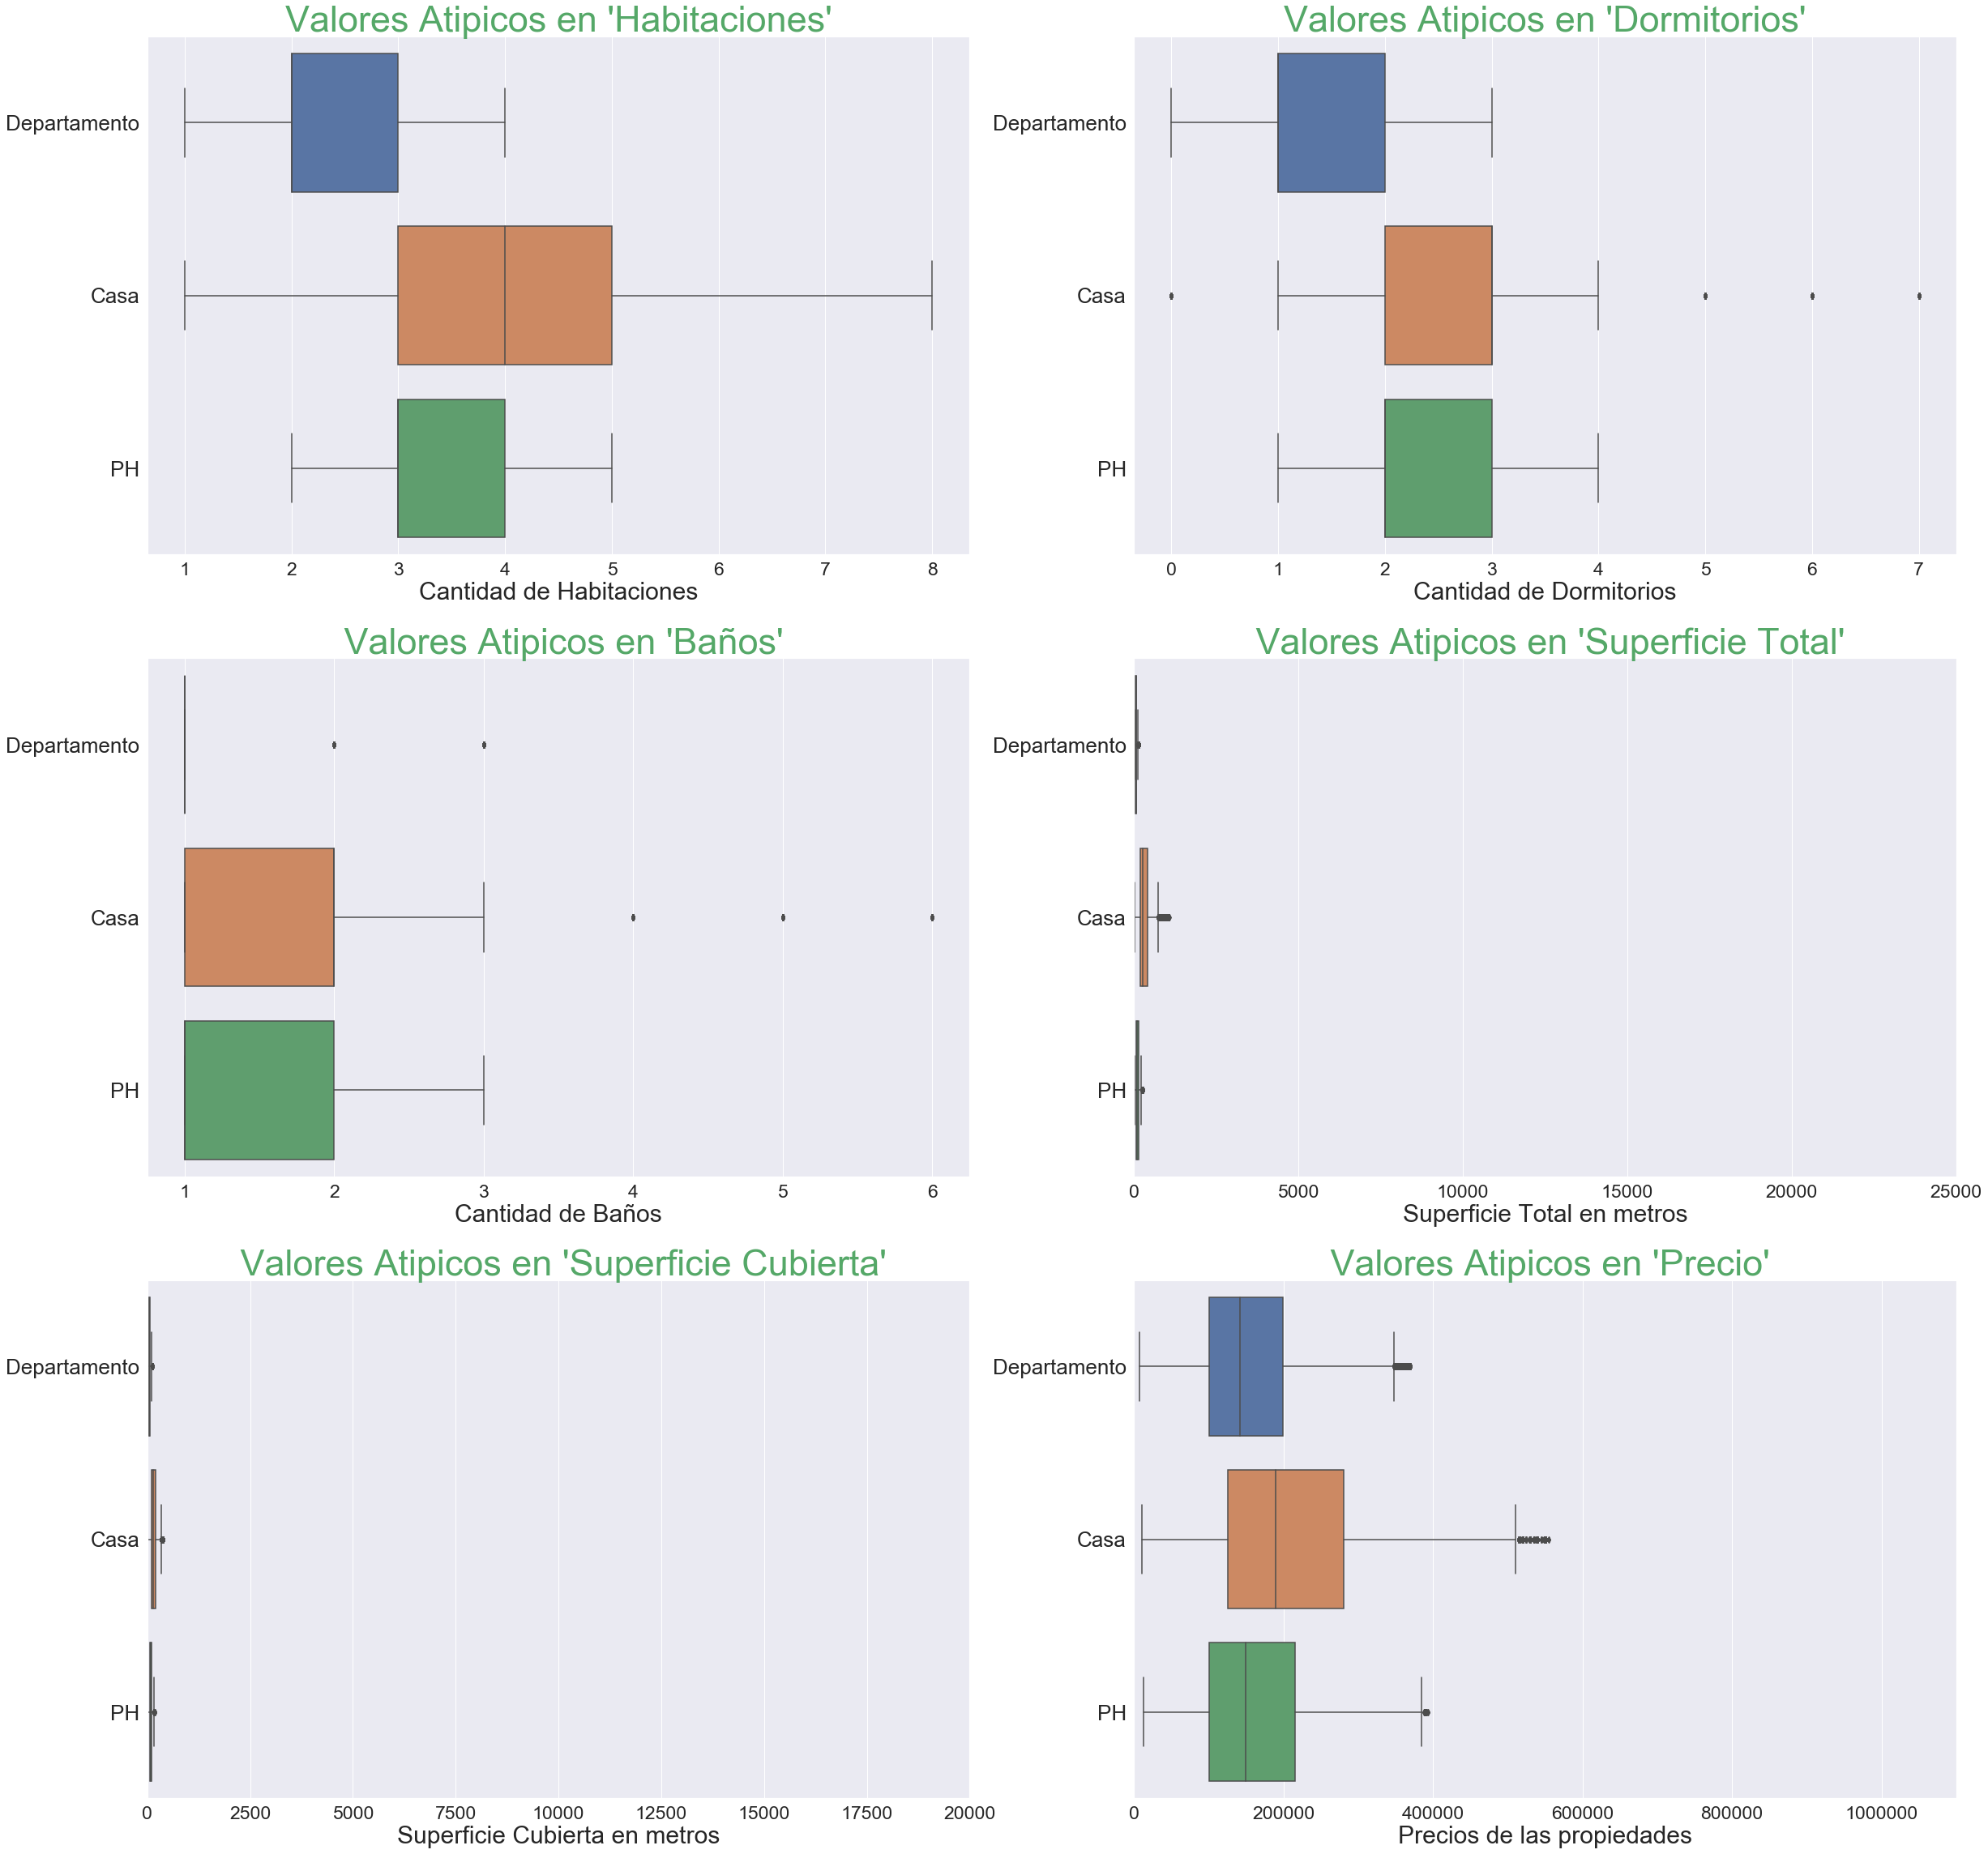

In [48]:
boxplot(df2_inst)

* DF4 NO-INSTANCIADO (3-Sigmas)

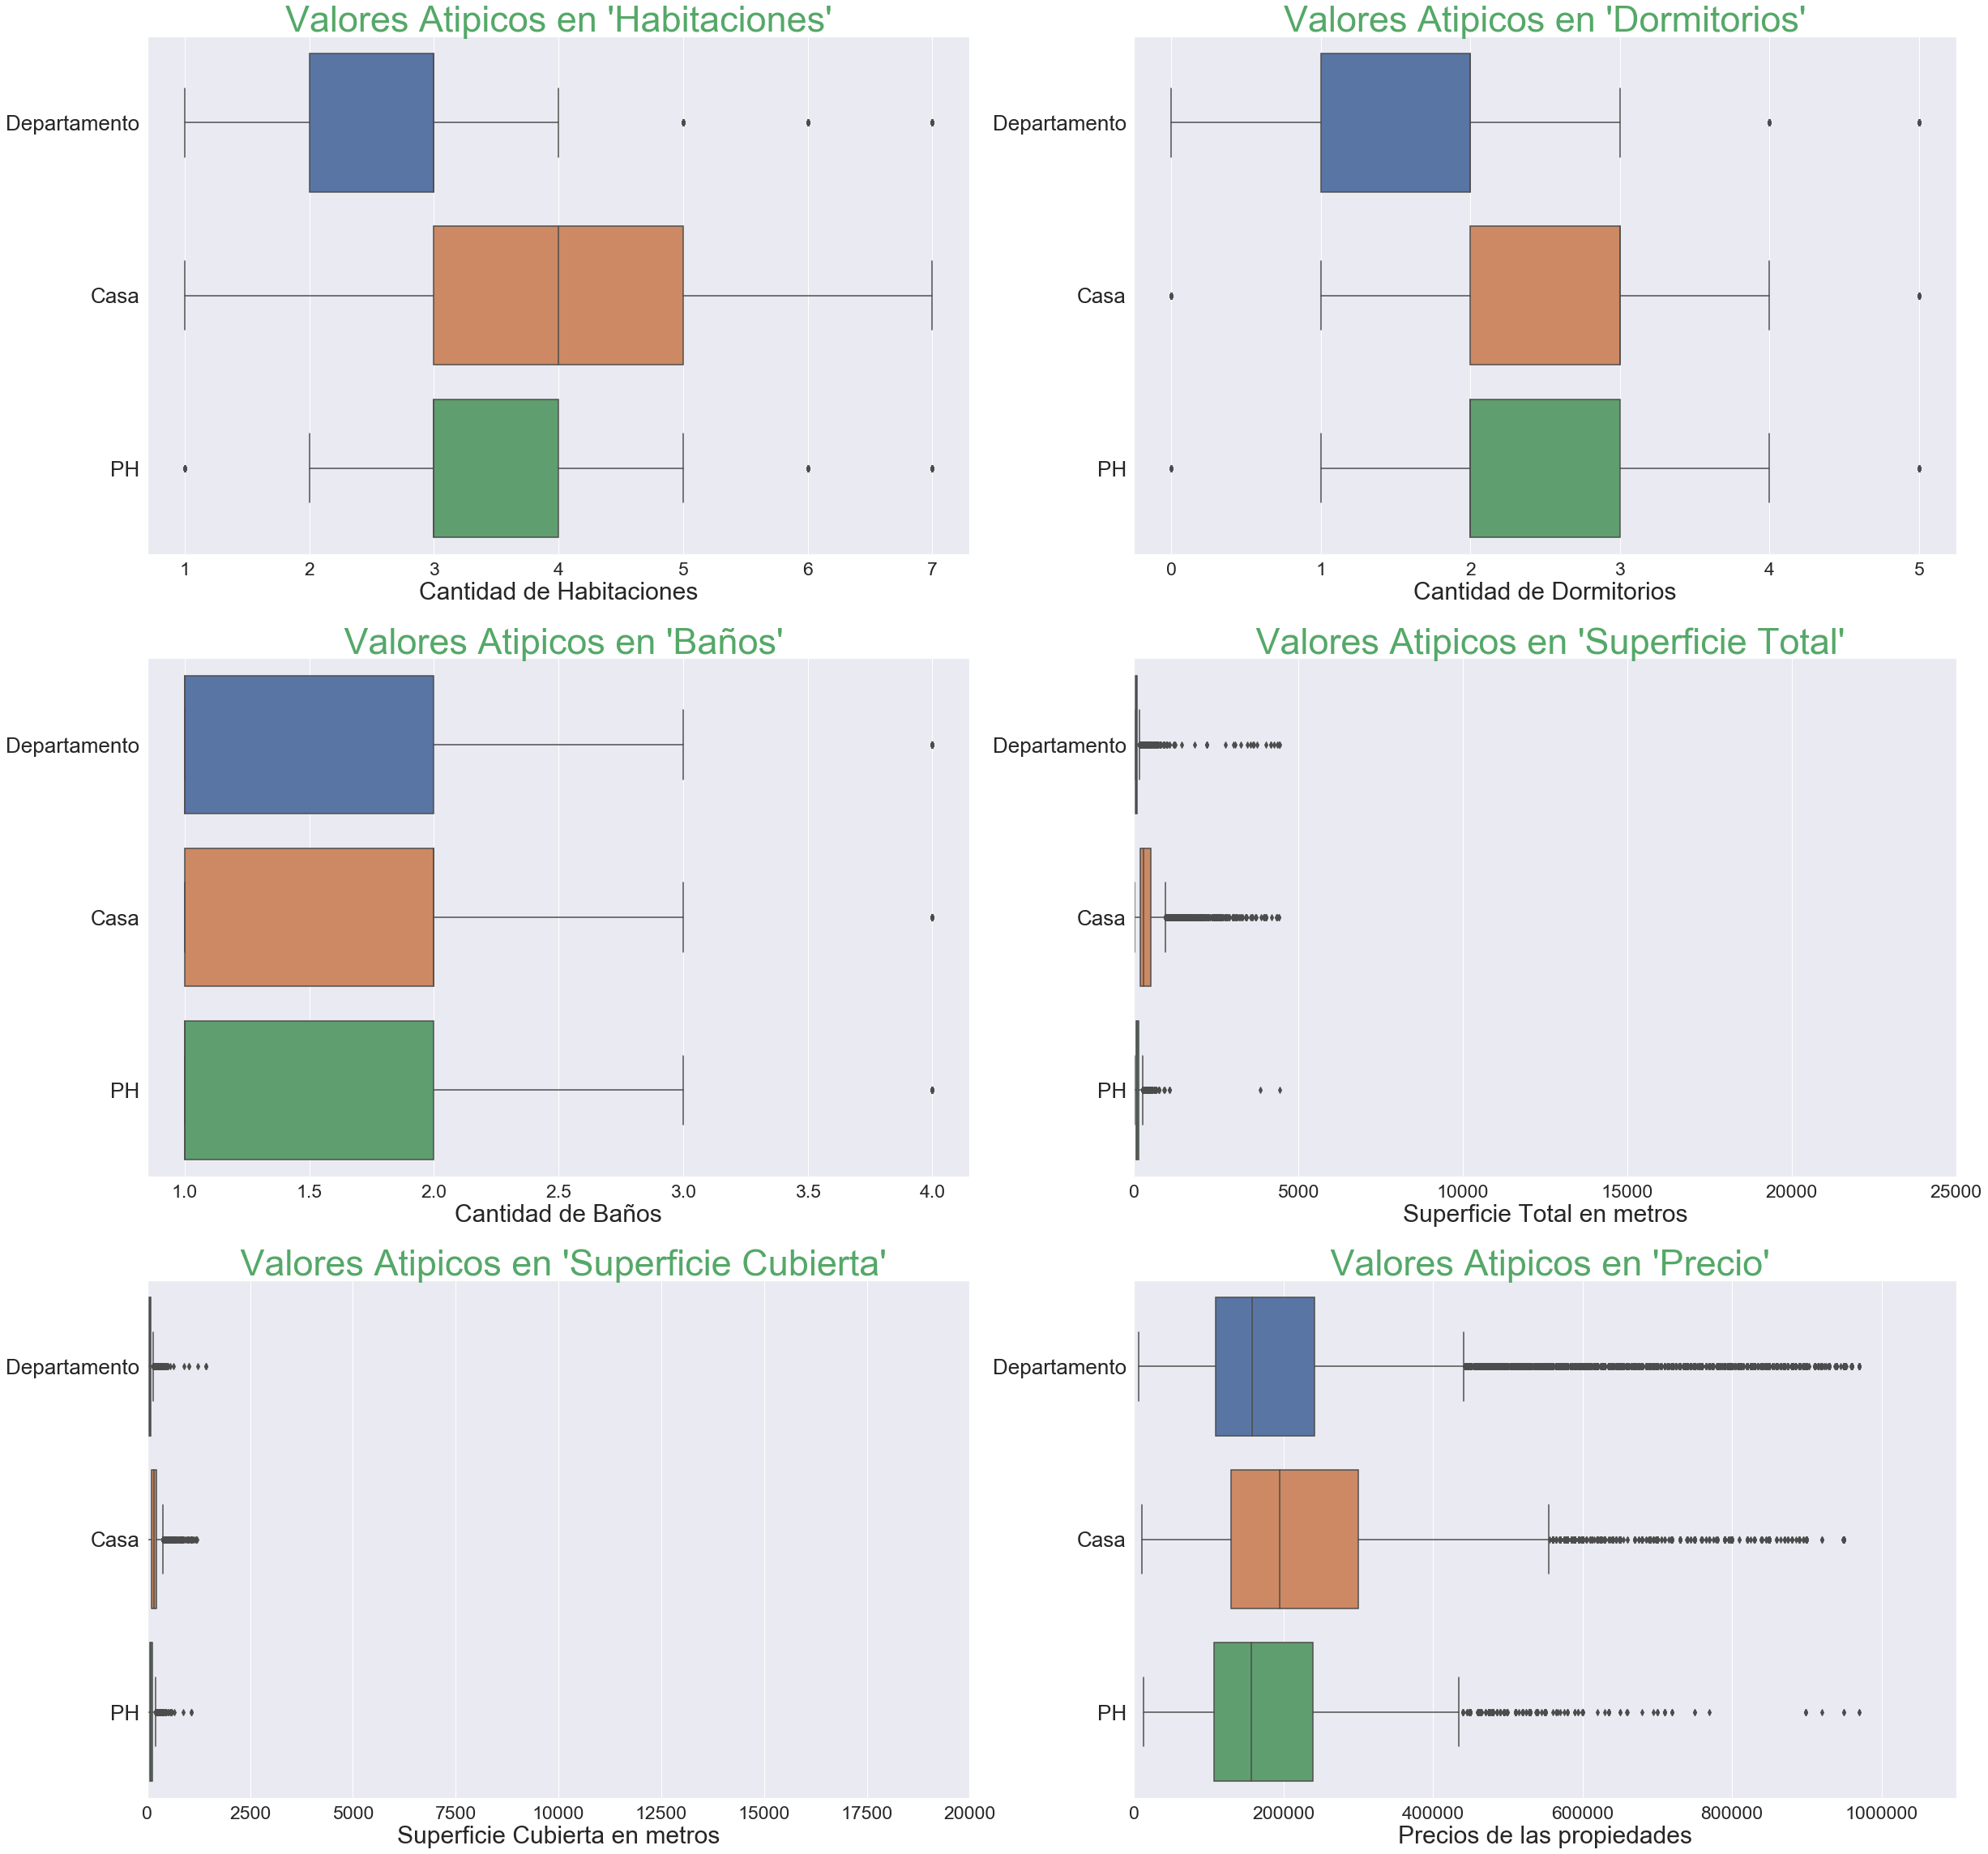

In [49]:
boxplot(df4)

* DF4 INSTANCIADO (3-Sigmas)

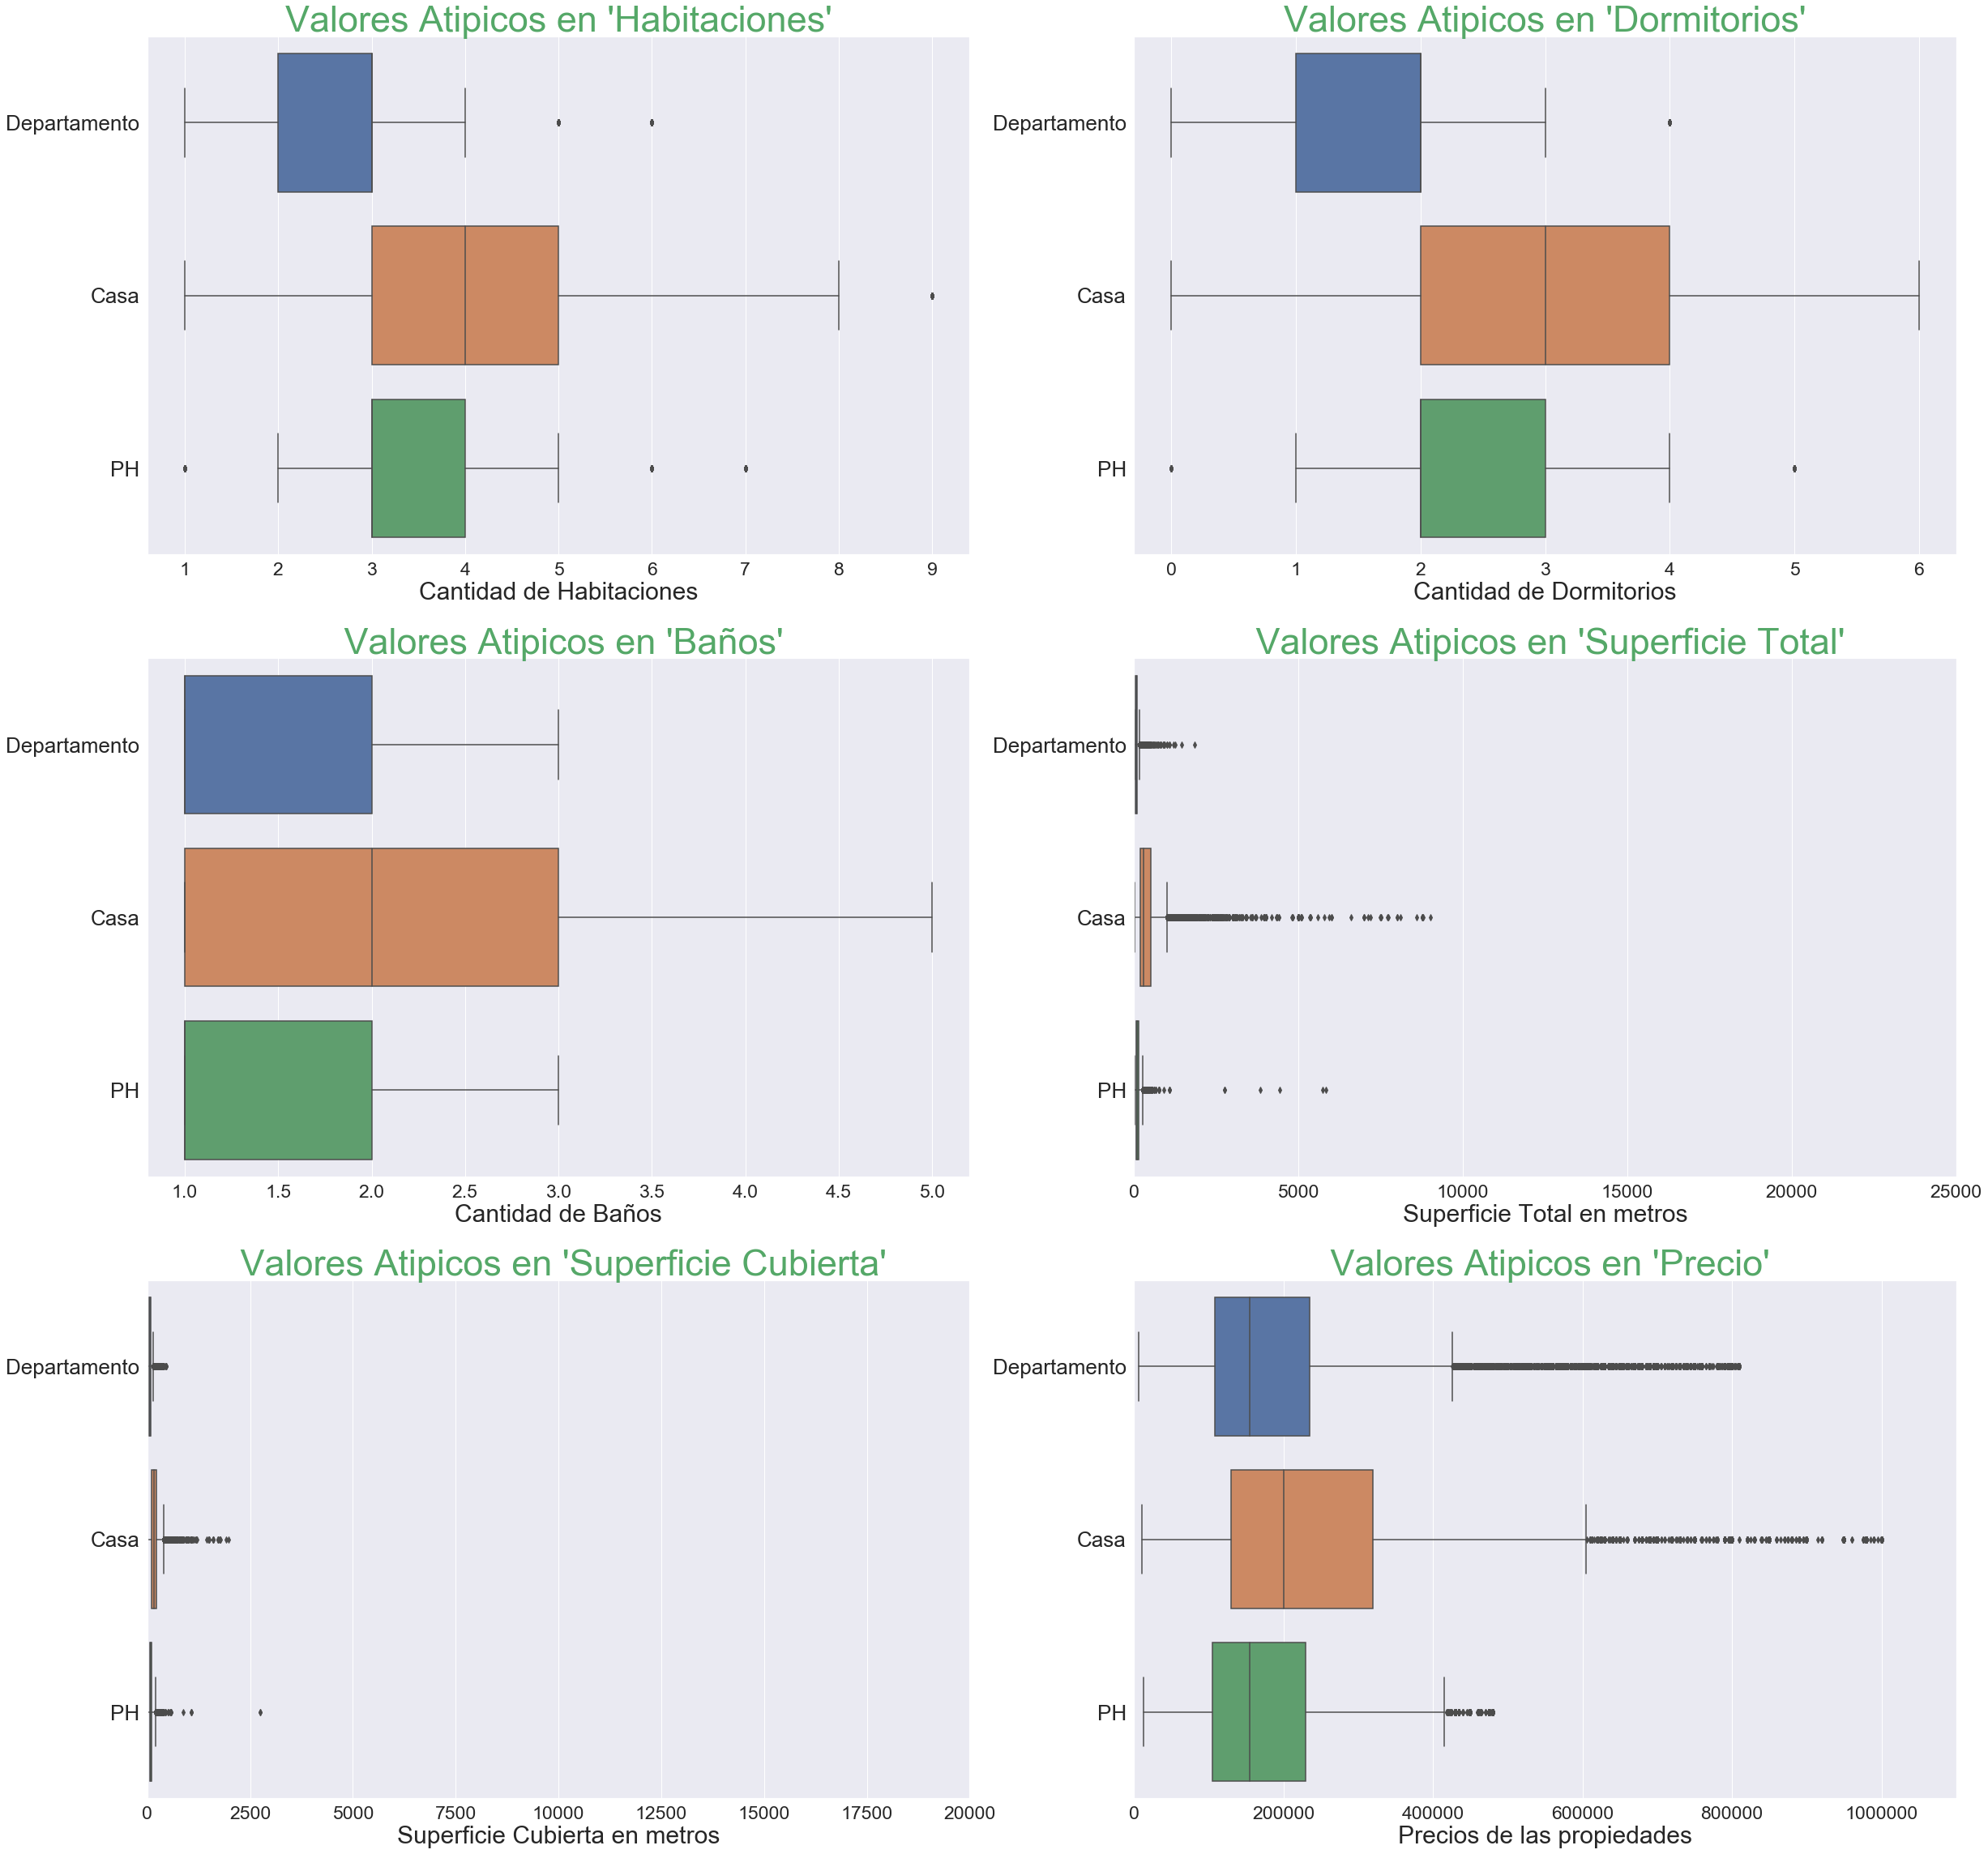

In [50]:
boxplot(df4_inst)

Dada la primera exploracion de Outliers puedo conlcuir que **Metodo IQR** sobre el DataFrame **df2 (no-instanciado)** es el que obtuvo el mejor desempeño y mejores resultados. Tambien veo que instanciar por tipo de propiedad los DataFrames para aplicarle los metodos no tuvo un cambio notorio en su desmpeño.

**DF2** -por el momento- pasa a ser mi DataFrame de *batalla*

Para mantener una buena practica, voy a explorar yo los datos de las 6 variables (una por una) y proceder a un filtrado para luego comparar con **df2**.

En mi exploracion a mano SI voy a instanciar por "tipo de propiedad" por pensamiento critico que el "tipo de propiedad" influye en las imputaciones de Atipicos.

<h4><center>ATIPICOS EXPLORADOS A MANO<h4><center>

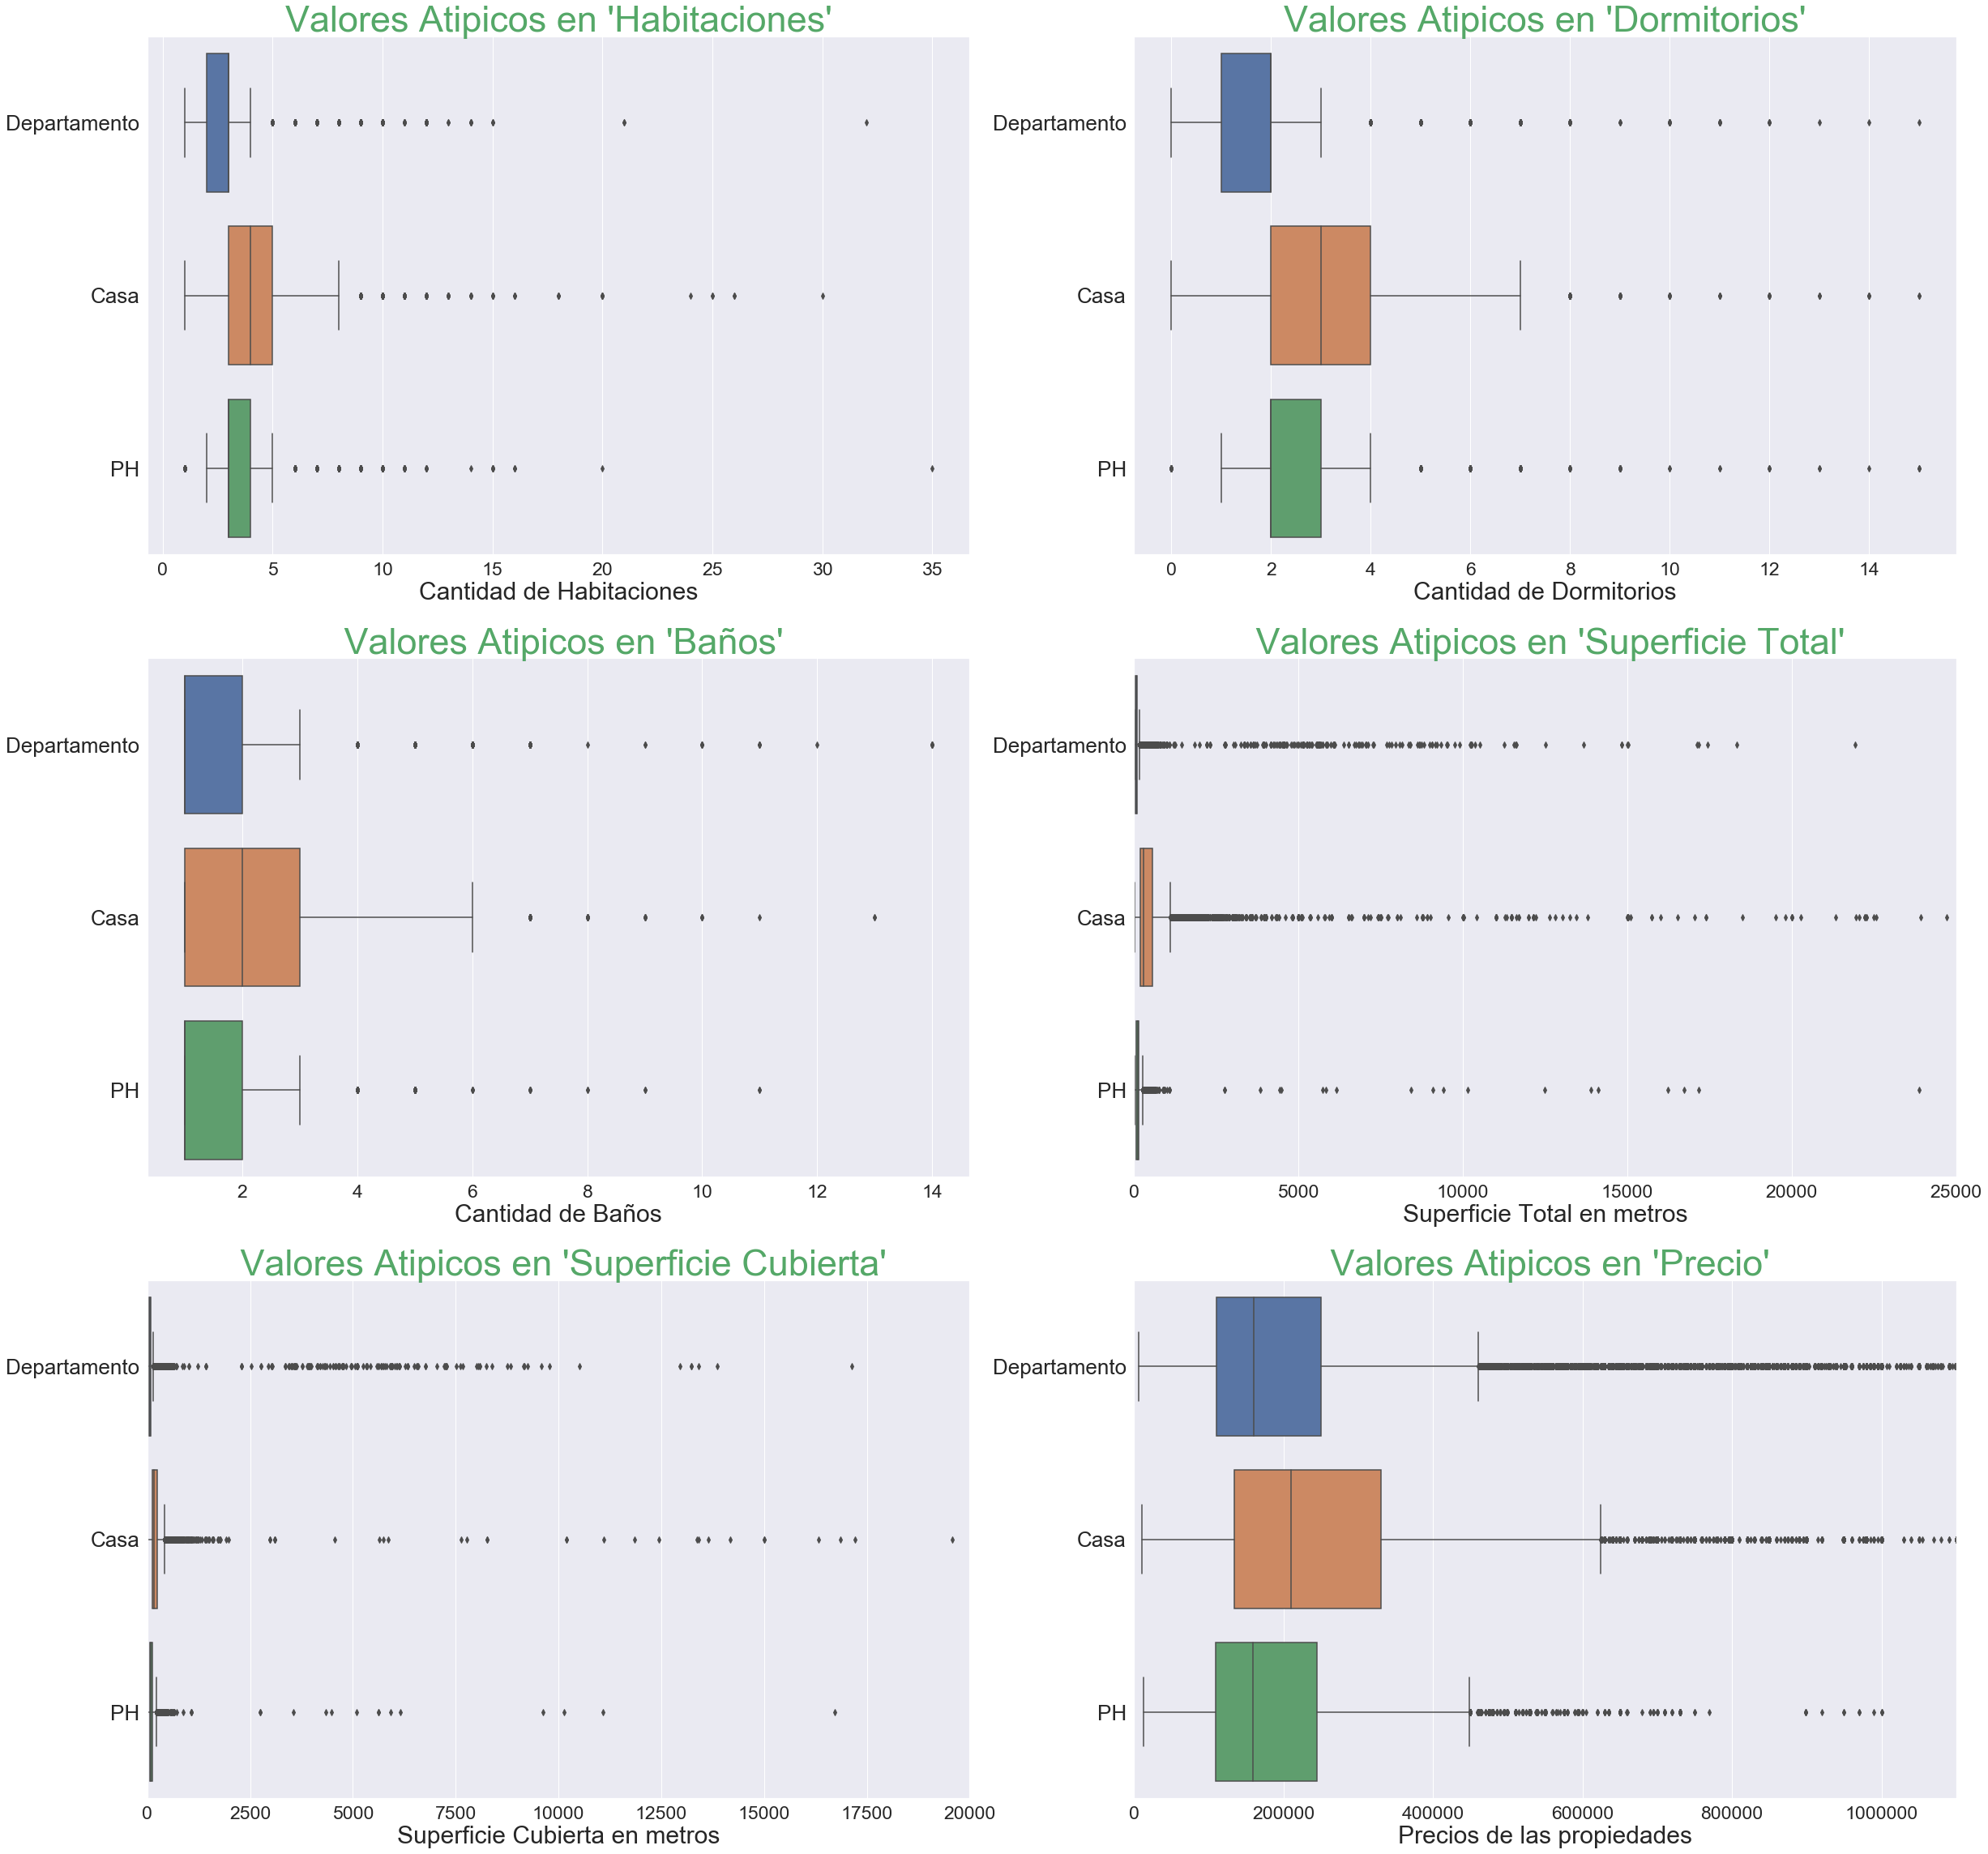

In [51]:
boxplot(df1)

* Distribucion de las variables en relacion a `Departamento`

In [52]:
df1[df1["property_type"] == "Departamento"].describe()

rooms       bedrooms      bathrooms  surface_total  \
count  105276.000000  105276.000000  102601.000000   91908.000000   
mean        2.756535       1.757371       1.506145      99.355094   
std         1.147911       0.951123       0.810472     651.143245   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      48.000000   
50%         3.000000       2.000000       1.000000      67.000000   
75%         3.000000       2.000000       2.000000      98.000000   
max        32.000000      15.000000      14.000000  108960.000000   

       surface_covered         price  
count     91605.000000  1.052760e+05  
mean         85.477223  2.360013e+05  
std         553.739140  3.008556e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.100000e+05  
50%          60.000000  1.600000e+05  
75%          85.000000  2.500000e+05  
max      104890.000000  3.243423e+07

* Distribucion de las variables en relacion a `Casa`

In [53]:
df1[df1["property_type"] == "Casa"].describe()

rooms      bedrooms     bathrooms  surface_total  \
count  21443.000000  21443.000000  20114.000000   16571.000000   
mean       4.500583      2.925057      2.137814     660.537204   
std        1.575698      1.348765      1.118184    3062.760390   
min        1.000000      0.000000      1.000000      11.000000   
25%        3.000000      2.000000      1.000000     200.000000   
50%        4.000000      3.000000      2.000000     300.000000   
75%        5.000000      4.000000      3.000000     562.000000   
max       30.000000     15.000000     13.000000  169000.000000   

       surface_covered         price  
count     16623.000000  2.144300e+04  
mean        249.307466  2.759671e+05  
std        1396.210573  2.851316e+05  
min           1.000000  1.000000e+04  
25%         112.000000  1.340000e+05  
50%         160.000000  2.100000e+05  
75%         236.000000  3.300000e+05  
max       75792.000000  1.111111e+07

* Distribucion de las variables en relacion a `PH`

In [54]:
df1[df1["property_type"] == "PH"].describe()

rooms      bedrooms     bathrooms  surface_total  \
count  14103.000000  14103.000000  13925.000000   13974.000000   
mean       3.534496      2.418918      1.483160     173.381995   
std        1.352364      1.163156      0.748517    2040.309071   
min        1.000000      0.000000      1.000000      10.000000   
25%        3.000000      2.000000      1.000000      70.000000   
50%        3.000000      2.000000      1.000000     105.000000   
75%        4.000000      3.000000      2.000000     151.000000   
max       35.000000     15.000000     11.000000  126062.000000   

       surface_covered         price  
count     13948.000000  1.410300e+04  
mean        130.620949  1.873488e+05  
std        1777.115882  1.120417e+05  
min           1.000000  1.300000e+04  
25%          56.000000  1.090000e+05  
50%          80.000000  1.595000e+05  
75%         118.000000  2.450000e+05  
max      126062.000000  1.750000e+06

* ESTUDIANDO `rooms`

In [55]:
rooms_depto_out= df1[(df1.property_type == "Departamento") & np.logical_and((df1.rooms == 0), (df1.rooms >=6))]
rooms_casa_out= df1[(df1.property_type == "Casa") & (df1.rooms >= 9)]
rooms_ph_out= df1[(df1.property_type == "PH") & (df1.rooms >= 5)]

In [56]:
print("Numero de propiedades que son DEPARTAMENTOS Y tiene 6 o MAS HABITACIONES: ", rooms_depto_out.shape)
print("Numero de propiedades que son CASAS Y tiene 10 o MAS HABITACIONES: ", rooms_casa_out.shape)
print("Numero de propiedades que son PHs Y tiene 5 o MAS HABITACIONES: ", rooms_ph_out.shape)

Numero de propiedades que son DEPARTAMENTOS Y tiene 6 o MAS HABITACIONES:  (0, 9)
Numero de propiedades que son CASAS Y tiene 10 o MAS HABITACIONES:  (372, 9)
Numero de propiedades que son PHs Y tiene 5 o MAS HABITACIONES:  (2323, 9)


In [58]:
rooms_outliers= pd.concat([rooms_depto_out, rooms_casa_out, rooms_ph_out])

print("Numero de Instancias de la Variable Rooms consideradas Outliers: ", rooms_outliers.shape)

Numero de Instancias de la Variable Rooms consideradas Outliers:  (2695, 9)


* ESTUDIANDO `bedrooms`

In [59]:
bedrooms_depto_out= df1[(df1.property_type == "Departamento") & (df1.bedrooms >= 5)]
bedrooms_casa_out= df1[(df1.property_type == "Casa") & (df1.bedrooms >= 7)]
bedrooms_ph_out= df1[(df1.property_type == "PH") & (df1.bedrooms >= 4)]

In [60]:
print("Numero de propiedades que son DEPARTAMENTOS Y tienen 5 o MAS DORMITORIOS: ", bedrooms_depto_out.shape)
print("Numero de propiedades que son CASAS Y tienen 8 o MAS DORMITORIOS: ", bedrooms_casa_out.shape)
print("Numero de propiedades que son PHs Y tienen 4 o MAS DORMITORIOS: ", bedrooms_ph_out.shape)

Numero de propiedades que son DEPARTAMENTOS Y tienen 5 o MAS DORMITORIOS:  (609, 9)
Numero de propiedades que son CASAS Y tienen 8 o MAS DORMITORIOS:  (162, 9)
Numero de propiedades que son PHs Y tienen 4 o MAS DORMITORIOS:  (1804, 9)


In [62]:
bedrooms_outliers = pd.concat([bedrooms_depto_out, bedrooms_casa_out, bedrooms_ph_out])

print("Numero de Instancias de la variable Bedrooms consideradas Outliers: ", bedrooms_outliers.shape)

Numero de Instancias de la variable Bedrooms consideradas Outliers:  (2575, 9)


* ESTUDIANDO `bathrooms`

In [63]:
bathrooms_depto_out= df1[(df1.property_type == "Departamento") & (df1.bathrooms >= 4)] 
bathrooms_casa_out= df1[(df1.property_type == "Casa") & (df1.bathrooms >= 5)]
bathrooms_ph_out= df1[(df1.property_type == "PH") & (df1.bathrooms >= 3)]

In [64]:
print("Numero de propiedades que son DEPARTAMENTOS Y tienen 4 o MAS BAÑOS: ", bathrooms_depto_out.shape)
print("Numero de propiedades que son CASAS Y tienen 7 o MAS BAÑOS: ", bathrooms_casa_out.shape)
print("Numero de propiedades que son PHs Y tienen 3 o MAS BAÑOS: ", bathrooms_ph_out.shape)

Numero de propiedades que son DEPARTAMENTOS Y tienen 4 o MAS BAÑOS:  (2995, 9)
Numero de propiedades que son CASAS Y tienen 7 o MAS BAÑOS:  (696, 9)
Numero de propiedades que son PHs Y tienen 3 o MAS BAÑOS:  (1058, 9)


In [66]:
bathrooms_outliers= pd.concat([bathrooms_depto_out, bathrooms_casa_out, bathrooms_ph_out])

print("Numero de Instancias de la variable Bathrooms consideradas Outliers: ", bathrooms_outliers.shape)

Numero de Instancias de la variable Bathrooms consideradas Outliers:  (4749, 9)


* ESTUDIANDO `surface_total`

In [67]:
surftotal_depto_out= df1[(df1.property_type == "Departamento") & (df1.surface_total > 160 )]

In [68]:
surftotal_casa_out= df1[(df1.property_type == "Casa") & (df1.surface_total > 680)]

In [69]:
surftotal_ph_out= df1[(df1.property_type == "PH") & (df1.surface_total > 200)]

In [70]:
print("Numero de Propiedades que son DEPARTAMENTOS Y tienen 160 mts2 DE SUPERFICIE TOTAL O MAS: ", surftotal_depto_out.shape)
print("Numero de Propiedades que son CASAS Y tienen 680 mts2 DE SUPERFICIE TOTAL O MAS: ", surftotal_casa_out.shape)
print("Numero de Propiedades que son PHs Y tienen 200 mts2 DE SUPERFICIE TOTAL O MAS: ", surftotal_ph_out.shape)

Numero de Propiedades que son DEPARTAMENTOS Y tienen 160 mts2 DE SUPERFICIE TOTAL O MAS:  (7990, 9)
Numero de Propiedades que son CASAS Y tienen 680 mts2 DE SUPERFICIE TOTAL O MAS:  (3328, 9)
Numero de Propiedades que son PHs Y tienen 200 mts2 DE SUPERFICIE TOTAL O MAS:  (1771, 9)


In [72]:
surftotal_outliers= pd.concat([surftotal_depto_out, surftotal_casa_out, surftotal_ph_out])

print("Numero de Instancias de la variable Surface_total consideradas Outliers: ", surftotal_outliers.shape)

Numero de Instancias de la variable Surface_total consideradas Outliers:  (13089, 9)


* ESTUDIANDO `surface_covered`

In [73]:
surfcover_depto_out= df1[(df1.property_type == "Departamento") & (df1.surface_covered > 120 )]

In [74]:
surfcover_casa_out= df1[(df1.property_type == "Casa") & (df1.surface_covered > 320)]

In [75]:
surfcover_ph_out= df1[(df1.property_type == "PH") & (df1.surface_covered > 140)]

In [76]:
print("Numero de Propiedades que son DEPARTAMENTOS Y tienen 120 mts2 DE SUPERFICIE CUBIERTA O MAS: ", surfcover_depto_out.shape)
print("Numero de Propiedades que son CASAS Y tienen 320 mts2 DE SUPERFICIE CUBIERTA O MAS: ", surfcover_casa_out.shape)
print("Numero de Propiedades que son PHs Y tienen 140 mts2 DE SUPERFICIE CUBIERTA O MAS: ", surfcover_ph_out.shape)

Numero de Propiedades que son DEPARTAMENTOS Y tienen 120 mts2 DE SUPERFICIE CUBIERTA O MAS:  (10586, 9)
Numero de Propiedades que son CASAS Y tienen 320 mts2 DE SUPERFICIE CUBIERTA O MAS:  (1862, 9)
Numero de Propiedades que son PHs Y tienen 140 mts2 DE SUPERFICIE CUBIERTA O MAS:  (2151, 9)


In [78]:
surfcover_outliers= pd.concat([surfcover_depto_out, surfcover_casa_out, surfcover_ph_out])

print("Numero de Instancias de la variable Surface_covered consideradas Outliers: ", surfcover_outliers.shape)

Numero de Instancias de la variable Surface_covered consideradas Outliers:  (14599, 9)


* ESTUDIANDO  `price`

In [79]:
price_depto_out= df1[(df1.property_type == "Departamento") & (df1.price > 350000 )]

In [80]:
price_casa_out= df1[(df1.property_type == "Casa") & (df1.price > 380000)]

In [81]:
price_ph_out= df1[(df1.property_type == "PH") & (df1.price > 210000)]

In [82]:
print("Numero de Propiedades que son DEPARTAMENTOS Y tienen PRECIO MAYOR A: ", price_depto_out.shape)
print("Numero de Propiedades que son CASAS Y tienen PRECIO MAYOR A: ", price_casa_out.shape)
print("Numero de Propiedades que son PHs Y tienen PRECIO MAYOR A: ", price_ph_out.shape)

Numero de Propiedades que son DEPARTAMENTOS Y tienen PRECIO MAYOR A:  (14369, 9)
Numero de Propiedades que son CASAS Y tienen PRECIO MAYOR A:  (4015, 9)
Numero de Propiedades que son PHs Y tienen PRECIO MAYOR A:  (4730, 9)


In [84]:
price_outliers= pd.concat([price_depto_out, price_casa_out, price_ph_out])

print("Numero de Instancias de la variable Price consideradas Outliers: ", price_outliers.shape)

Numero de Instancias de la variable Price consideradas Outliers:  (23114, 9)


* INSTANCIO LOS OUTLIERS EN UN NUEVO OBJETO

In [85]:
outliers_df1= pd.concat([rooms_outliers, bedrooms_outliers, bathrooms_outliers, surftotal_outliers,
                        surfcover_outliers, price_outliers])

print("Propiedades que considere como Outliers (exploracion a mano):", outliers_df1.shape)

In [87]:
df5.drop(index= outliers_df1.index, inplace=True)

In [88]:
df5.describe()

rooms       bedrooms      bathrooms  surface_total  \
count  110789.000000  110789.000000  107113.000000   94493.000000   
mean        2.721507       1.704610       1.328868      89.036161   
std         1.069824       0.909769       0.561374      82.427306   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      48.000000   
50%         3.000000       2.000000       1.000000      65.000000   
75%         3.000000       2.000000       2.000000      92.000000   
max        32.000000       6.000000       4.000000     680.000000   

       surface_covered          price  
count     94258.000000  110789.000000  
mean         67.406236  157441.499878  
std          38.773335   71817.382978  
min           1.000000    7500.000000  
25%          43.000000  100000.000000  
50%          57.000000  143000.000000  
75%          79.000000  199999.000000  
max         320.000000  380000.000000

In [89]:
print("DataFrame curado de Outliers con MIS PARAMETROS: ", df5.shape)

DataFrame curado de Outliers con MIS PARAMETROS:  (110789, 9)


* BOXPLOT DE LAS VARIABLES CURADAS DE ATIPICOS CON *MIS* PARAMETROS

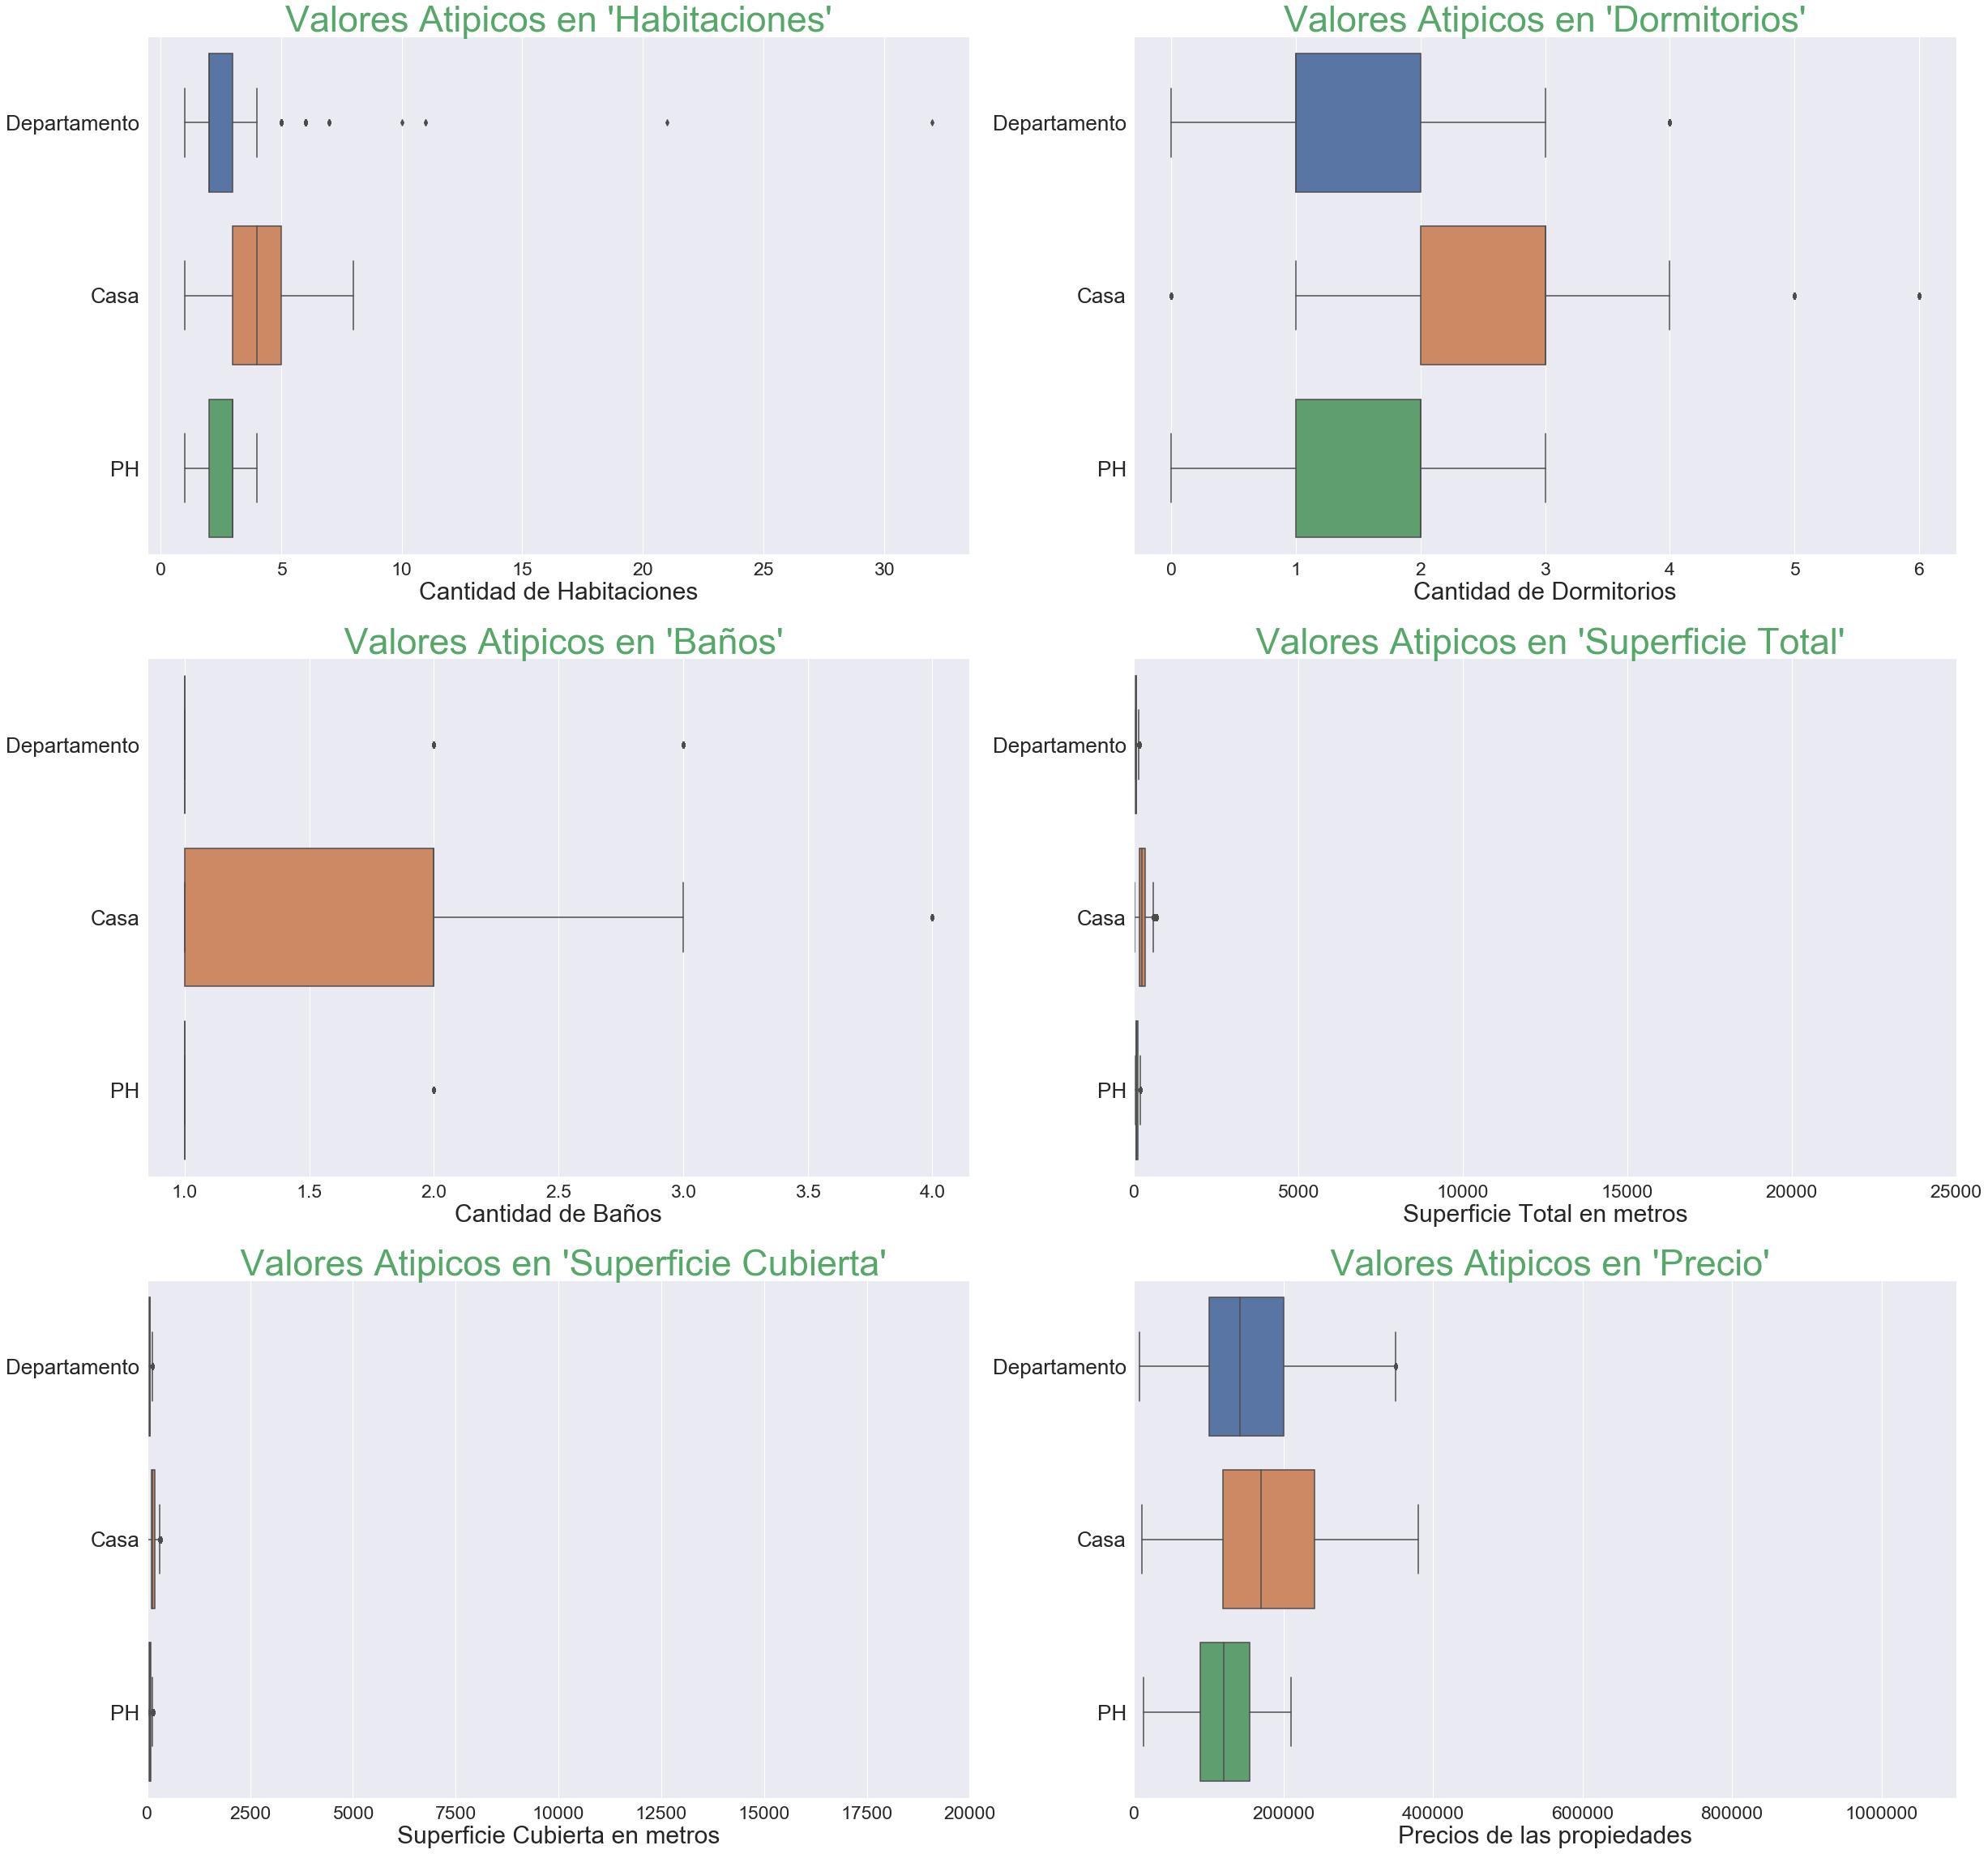

In [90]:
boxplot(df5)

**ATIPICOS CON ISOLATION FOREST**

In [91]:
from pyod.models.iforest import IForest

In [92]:
X= df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [93]:
X= X.fillna(X.mean())

In [94]:
clf= IForest()

In [95]:
clf.fit(X)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [96]:
y_pred = clf.predict(X)

In [97]:
X[y_pred == 1].shape # Outliers

(14045, 6)

In [98]:
df6.drop(index=X[y_pred == 1].index, inplace= True)

In [99]:
df6.describe()

rooms       bedrooms      bathrooms  surface_total  \
count  126777.000000  126777.000000  123509.000000  111923.000000   
mean        2.914243       1.889459       1.464614     100.725981   
std         1.061057       0.915107       0.676350      88.913895   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      50.000000   
50%         3.000000       2.000000       1.000000      73.000000   
75%         4.000000       3.000000       2.000000     116.000000   
max         8.000000      15.000000       5.000000    1249.000000   

       surface_covered         price  
count    111659.000000  1.267770e+05  
mean         76.526335  1.976661e+05  
std          43.640635  1.337169e+05  
min           1.000000  6.000000e+03  
25%          45.000000  1.100000e+05  
50%          64.000000  1.600000e+05  
75%          95.000000  2.420000e+05  
max        1000.000000  1.400000e+06

In [100]:
print("Dataframe curado de Outliers con metodo IsolationForest de Pyod: ", df6.shape)

Dataframe curado de Outliers con metodo IsolationForest de Pyod:  (126777, 9)


**ATIPICOS CON LOCALOUTLIERFACTOR**

In [101]:
from sklearn.neighbors import LocalOutlierFactor

In [102]:
clf1= LocalOutlierFactor(n_neighbors= 5)

In [103]:
X= df1[["surface_total", "surface_covered", "rooms", "bathrooms", "bedrooms", "price"]].fillna(X.mean())

In [104]:
clf.fit(X)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [105]:
y_pred= clf.predict(X)

In [106]:
X[y_pred == 1].shape #Outliers

(14082, 6)

In [107]:
df7.drop(index=X[y_pred == 1].index, inplace=True)

In [108]:
df7.describe()

rooms       bedrooms      bathrooms  surface_total  \
count  126740.000000  126740.000000  123474.000000  111157.000000   
mean        2.877071       1.860991       1.448273      99.278228   
std         1.049282       0.912115       0.659357      88.486696   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      50.000000   
50%         3.000000       2.000000       1.000000      72.000000   
75%         4.000000       3.000000       2.000000     114.000000   
max         8.000000       5.000000       4.000000    1200.000000   

       surface_covered         price  
count    110890.000000  1.267400e+05  
mean         75.256389  1.955809e+05  
std          41.371191  1.328943e+05  
min           1.000000  6.000000e+03  
25%          45.000000  1.100000e+05  
50%          63.000000  1.590000e+05  
75%          93.000000  2.400000e+05  
max         350.000000  1.650000e+06

In [109]:
print("Dataframe curado de Outliers con metodo LocalOutlierFactor: ", df7.shape)

Dataframe curado de Outliers con metodo LocalOutlierFactor:  (126740, 9)


**COMPARACION DE TODOS LOS METODOS DE ELIMACION DE OUTLIERS**

In [110]:
print("DataFrame Original con Outliers: ", df1.shape)
print("DataFrame curado de Outliers con MIS PARAMETROS: ", df5.shape)
print("DataFrame curado de Outliers con metodo elegido: ", df2.shape)
print("Dataframe curado de Outliers con metodo IsolationForest de Pyod: ", df6.shape)
print("Dataframe curado de Outliers con metodo LocalOutlierFactor: ", df7.shape)

DataFrame Original con Outliers:  (140822, 9)
DataFrame curado de Outliers con MIS PARAMETROS:  (110789, 9)
DataFrame curado de Outliers con metodo elegido:  (112876, 9)
Dataframe curado de Outliers con metodo IsolationForest de Pyod:  (126777, 9)
Dataframe curado de Outliers con metodo LocalOutlierFactor:  (126740, 9)


**CONLCUSION VALORES ATIPICOS**

Luego de evaluar todos los resultados de de los 4 metodos empleados para la deteccion y eliminacion de Outliers, concluyo en que **IQR** es, por mucho, el metodo mas fiable, de mejores resultado y , no por ultimo menos importante sino mas, el mas rapido y simple de implementar. 

Concluyo entonces en que **DF2** va a seguir siendo mi DataFrame para trabajar sobre este nuevo proyecto. Este mismo es el que voy a usar para evaluar con el modelo del *Proyecto 1*. Asi mismo, voy a recrear el mismo DataFrame usado en el proyecto anterior para compararlo con este nuevo que *cure* yocon mayores herramientas.

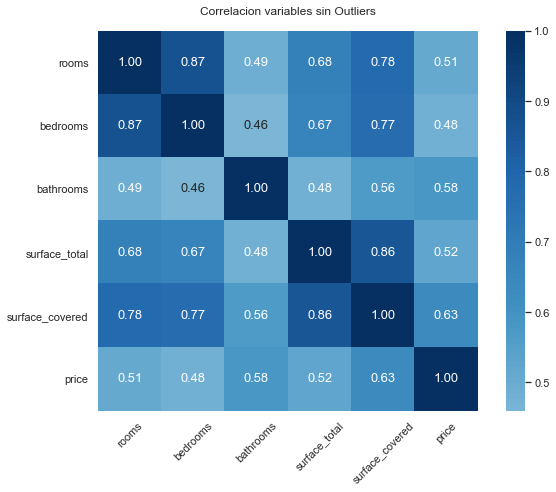

In [138]:
plt.figure(figsize=(9, 7))

corr = df2.corr()

sns.heatmap(data = corr, cbar=True, square=True, annot=True, 
            fmt= '.2f', annot_kws={'size': 13}, 
            xticklabels= corr.columns, yticklabels= corr.columns, 
            cmap='RdBu', center=0)
plt.title('Correlacion variables sin Outliers', pad=16)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

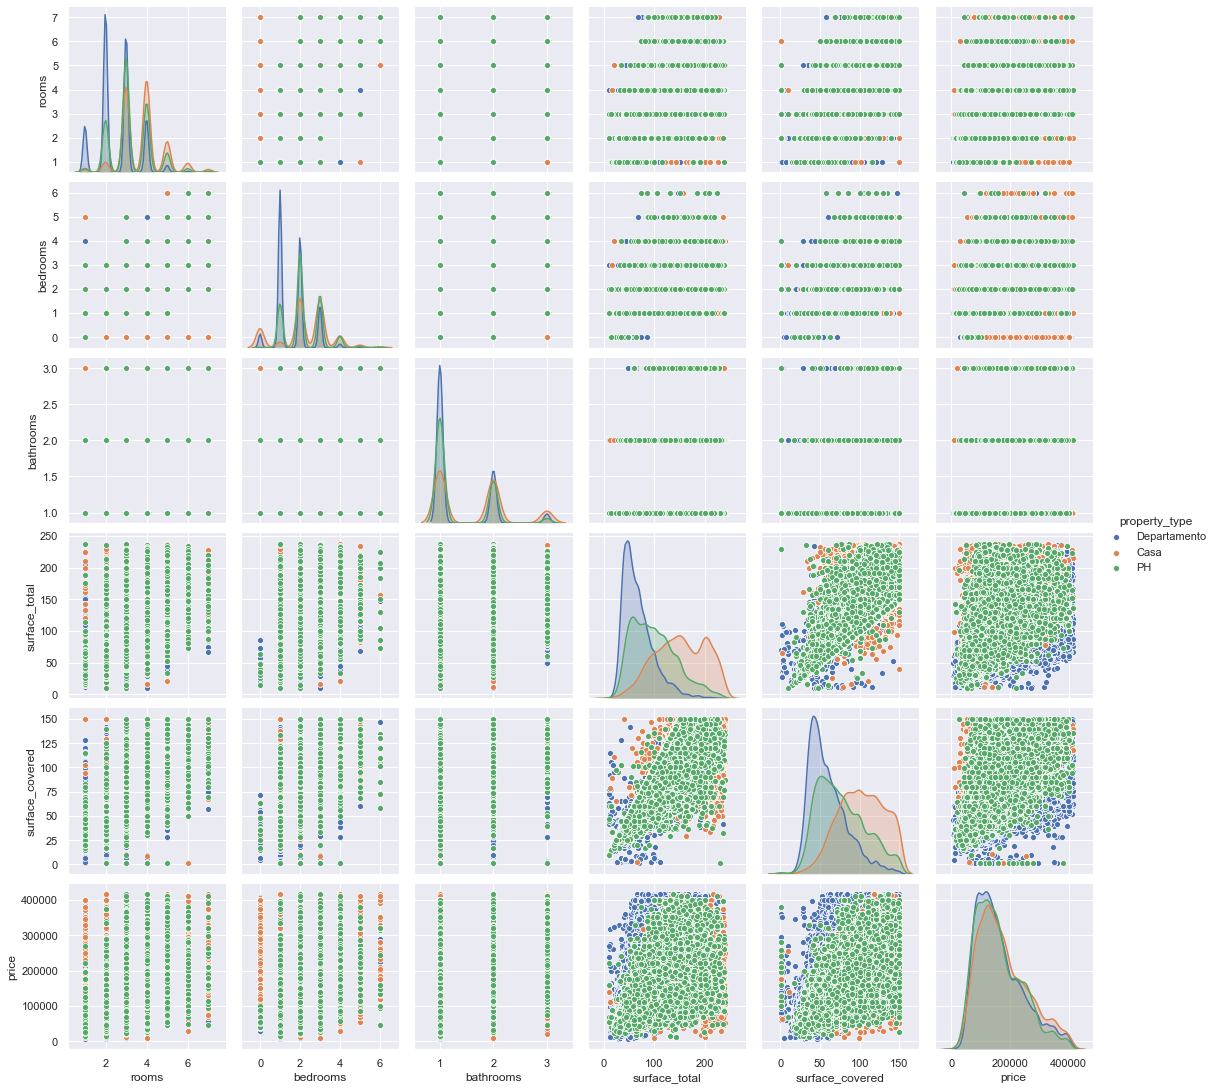

In [112]:
sns.pairplot(df2, hue="property_type")

In [113]:
df2["property_type"].value_counts()

Departamento    92844
PH              11941
Casa             8091
Name: property_type, dtype: int64

<h4><center>VALORES FALTANTES</center></h4> 

In [114]:
import missingno as msno

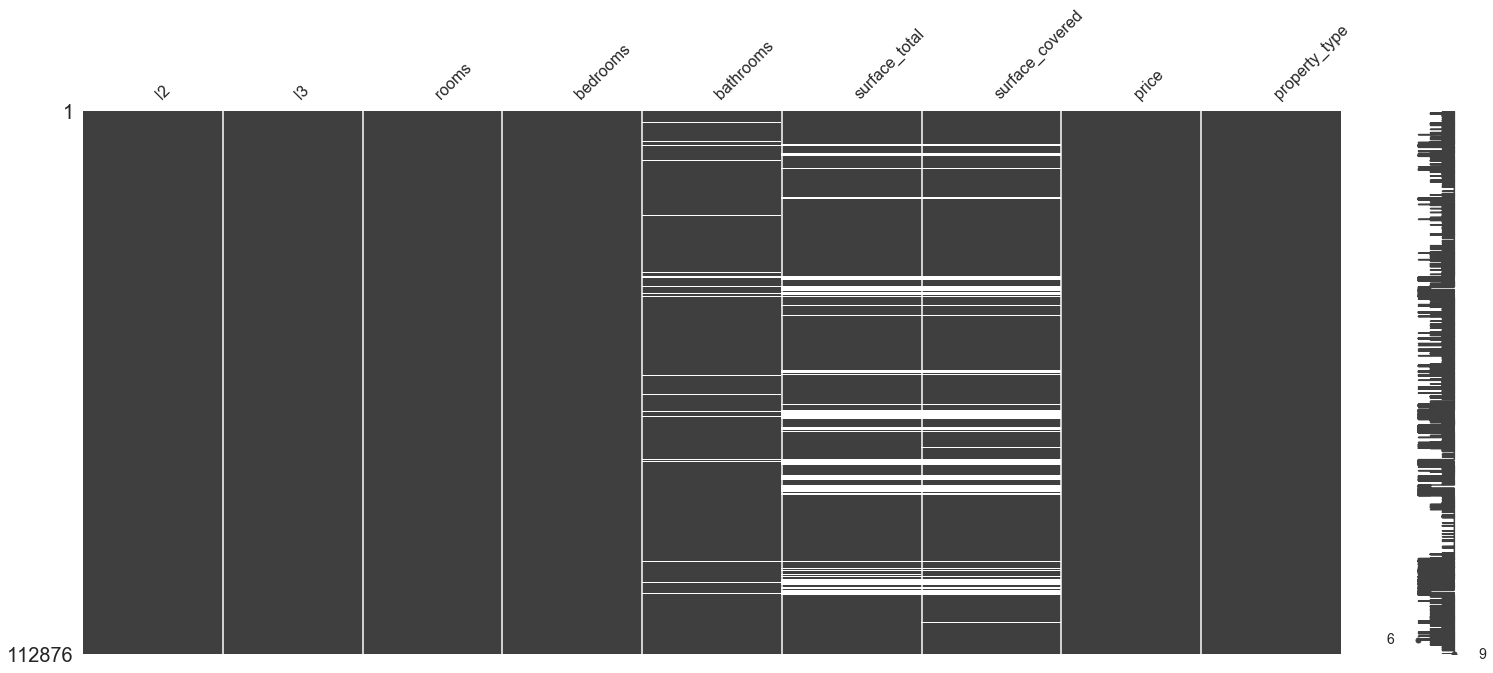

In [115]:
msno.matrix(df2)

* Se puede observar un claro patron en los Valores Faltantes de `surface_total` y `surface_covered`. Cuando una posee VF, la otra tambien. Esto me da a entender que: VF en `surface_total` y `surface_covered` son *MAR*. Su patrones son casi identicos, es decir alguna variable (quizas no observada) detona la no-respuesta en ambas.

* En cuanto a `bathrooms` puedo observar que existe una relacion en los patrones(poco clara) de VF pero no puedo encontrar una relacion en cuanto al *porque*, es decir considero que VF en `bathrooms` son *MCAR*.

Voy a descomprimir el DataFrame por tipos de propiedad una vez mas, para ver como se comportan estos VF segun el tipo de  propiedad.

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112876 entries, 11 to 146653
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   l2               112876 non-null  object 
 1   l3               112876 non-null  object 
 2   rooms            112876 non-null  float64
 3   bedrooms         112876 non-null  float64
 4   bathrooms        109273 non-null  float64
 5   surface_total    96338 non-null   float64
 6   surface_covered  96075 non-null   float64
 7   price            112876 non-null  float64
 8   property_type    112876 non-null  object 
dtypes: float64(6), object(3)
memory usage: 13.6+ MB


In [117]:
df2.corr()

rooms  bedrooms  bathrooms  surface_total  \
rooms            1.000000  0.871323   0.490911       0.684298   
bedrooms         0.871323  1.000000   0.459904       0.666326   
bathrooms        0.490911  0.459904   1.000000       0.477975   
surface_total    0.684298  0.666326   0.477975       1.000000   
surface_covered  0.779076  0.770237   0.564589       0.857522   
price            0.513617  0.482677   0.579947       0.524929   

                 surface_covered     price  
rooms                   0.779076  0.513617  
bedrooms                0.770237  0.482677  
bathrooms               0.564589  0.579947  
surface_total           0.857522  0.524929  
surface_covered         1.000000  0.633272  
price                   0.633272  1.000000

In [118]:
df2_depto= df2[df2["property_type"] == "Departamento"]
df2_casa= df2[df2["property_type"] == "Casa"]
df2_ph= df2[df2["property_type"] == "PH"]

In [119]:
# Gracias Dewith Mirarmón por esta funcion.

def missing_values_table(df):
    
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

* Valores Faltantes en Dataframe Original

In [120]:
missing_values_table(df2)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
surface_covered           16801               14.9
surface_total             16538               14.7
bathrooms                  3603                3.2

* Valores Faltantes en Departamentos

In [121]:
missing_values_table(df2_depto)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
surface_covered           12788               13.8
surface_total             12515               13.5
bathrooms                  2557                2.8

* Valores Faltantes en Casas

In [122]:
missing_values_table(df2_casa)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
surface_total              3906               48.3
surface_covered            3869               47.8
bathrooms                   897               11.1

* Valores Faltantes en Phs

In [123]:
missing_values_table(df2_ph)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
bathrooms                   149                1.2
surface_covered             144                1.2
surface_total               117                1.0

En una observacion mas profunda, se observa que la gran mayoria de los Valores Faltantes se encuentra en el tipo de propiedad **Casa** , la cual a su ves es la que menos instancias tiene el Dataframe.

* Imputando Valores Faltantes con *Mediana*

In [124]:
imp_median = SimpleImputer(strategy='median')
data_imp_median= df2.copy()
columns= ["bathrooms", "surface_total", "surface_covered"]
imp_median.fit(data_imp_median[columns])
data_imp_median[columns]= imp_median.transform(data_imp_median[columns])

* Imputando Valores Faltantes con *Promedio*

In [125]:
imp_mean= SimpleImputer(strategy="mean")
data_imp_mean= df2.copy()
columns=["bathrooms", "surface_total", "surface_covered"]
imp_mean.fit(data_imp_mean[columns])
data_imp_mean[columns]= imp_mean.transform(data_imp_mean[columns])

* Imputando Valores Faltantes con **IterativeImputer**

* * Creo 3 Iteradores distintos:

                             _ 'estimator' = default
                             _ 'estimator' = ExtraTreesRegressor
                             _ 'estimator' = KNeigborsRegressor

In [149]:
imp_itt_bys= IterativeImputer(max_iter= 7, random_state=42, sample_posterior=True)
imp_itt_etr= IterativeImputer(ExtraTreesRegressor(), max_iter=7,  random_state=42)
imp_itt_knn= IterativeImputer(KNeighborsRegressor(), max_iter= 9, random_state= 42)

In [150]:
data_imp_itt_bys= df2.copy()
columns=["rooms","bedrooms","bathrooms","surface_total","surface_covered"]
imp_itt_bys.fit(data_imp_itt_bys[columns])
data_imp_itt_bys[columns]= imp_itt_bys.transform(data_imp_itt_bys[columns]).round()

In [151]:
data_imp_itt_etr= df2.copy()
columns=["rooms","bedrooms","bathrooms","surface_total","surface_covered"]
imp_itt_etr.fit(data_imp_itt_etr[columns])
data_imp_itt_etr[columns]= imp_itt_etr.transform(data_imp_itt_etr[columns]).round()

C:\Users\milto\anaconda3\envs\Data_Science\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [152]:
data_imp_itt_knn= df2.copy()
columns=["rooms","bedrooms","bathrooms","surface_total","surface_covered"]
imp_itt_knn.fit(data_imp_itt_knn[columns])
data_imp_itt_knn[columns]= imp_itt_knn.transform(data_imp_itt_knn[columns])

C:\Users\milto\anaconda3\envs\Data_Science\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [130]:
# Gracias Dewith Mirármon por esta funcion

def impute_scatter_compare(df_original, df_imputed, var_null, vars_compare):
  
   
    plt.figure(figsize=(len(df_imputed)*4.5, len(vars_compare)*3.5))
    plt.subplots_adjust(wspace=0.15, hspace=0.15)
    plot_num = 1
    for i, var in enumerate(vars_compare):
        for name, df in df_imputed:
            plt.subplot(len(vars_compare), len(df_imputed), plot_num)
            if i == 0:
                plt.title(name, fontsize= 16, color= 'r')
            
            nulls = df_original.isnull()[var_null].astype(int)
          
            sns.scatterplot(var_null, var, data=df[nulls == 0], s=25)
            sns.scatterplot(var_null, var, data=df[nulls == 1], s=25)
          
            cols = len(df_imputed)
            filas = len(vars_compare)
            n_plots = cols * filas
            
            
          
            x_labels = list(np.arange(n_plots-cols+1, n_plots + 1))
            if plot_num in x_labels:
                plt.xlabel(var_null, fontsize=15, color= 'g')
            else:
                plt.xlabel('')
                plt.xticks(())
           
            y_labels = [1]
            while len(y_labels) < filas:
                y_labels.append(y_labels[-1]+cols)
                if len(y_labels) == filas:
                    continue
            if plot_num in y_labels:
                plt.ylabel(var, rotation= 0, fontsize=20, labelpad=30)
            else:
                plt.ylabel('')
                plt.yticks(())
            plot_num += 1
    plt.show()

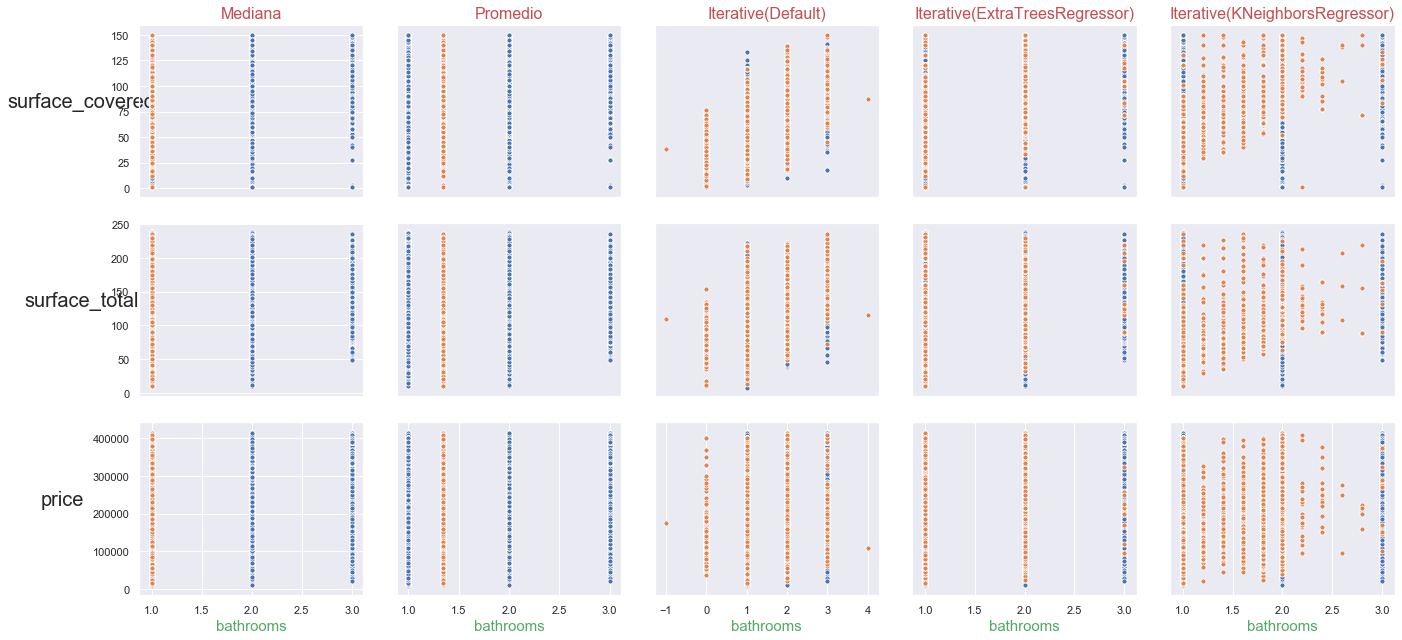

In [131]:
df_imputed = [('Mediana', data_imp_median), ('Promedio', data_imp_mean),
              ('Iterative(Default)', data_imp_itt_bys), ('Iterative(ExtraTreesRegressor)', data_imp_itt_etr),
              ('Iterative(KNeighborsRegressor)', data_imp_itt_knn)]

var_null = 'bathrooms'
vars_compare = ["surface_covered", "surface_total","price"]

impute_scatter_compare(df2, df_imputed, var_null, vars_compare)

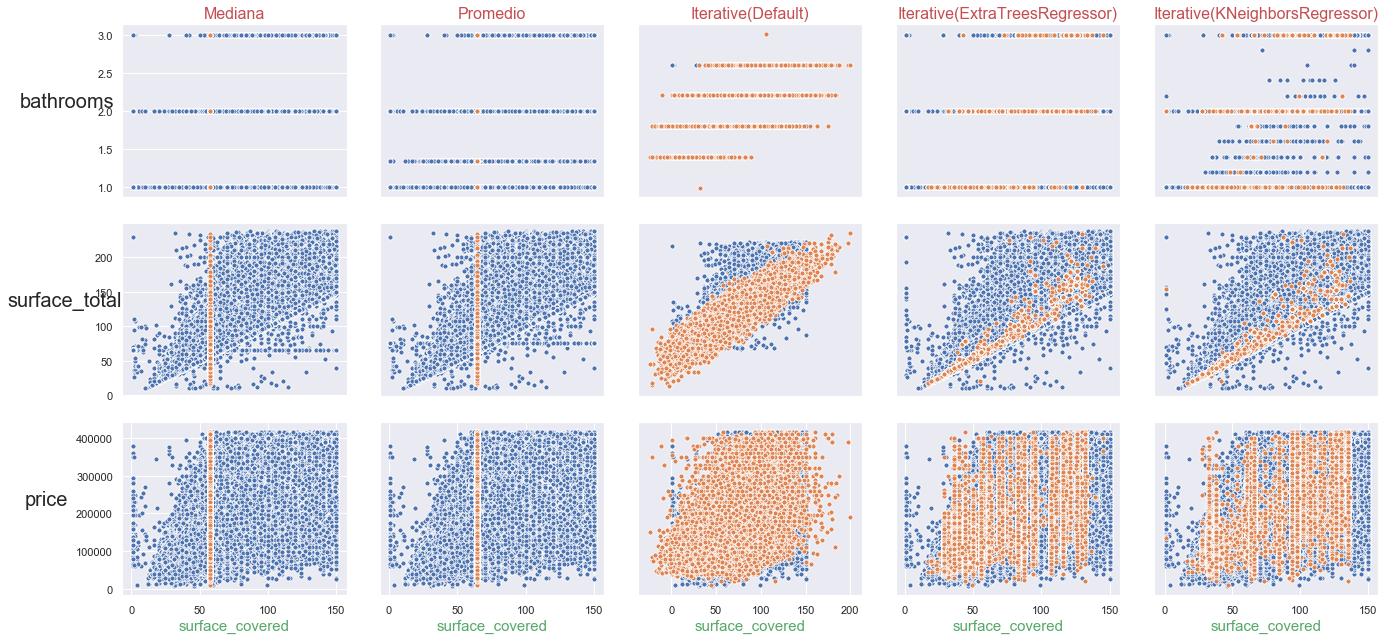

In [132]:
var_null = 'surface_covered'
vars_compare = ["bathrooms", "surface_total","price"]

impute_scatter_compare(df2, df_imputed, var_null, vars_compare)

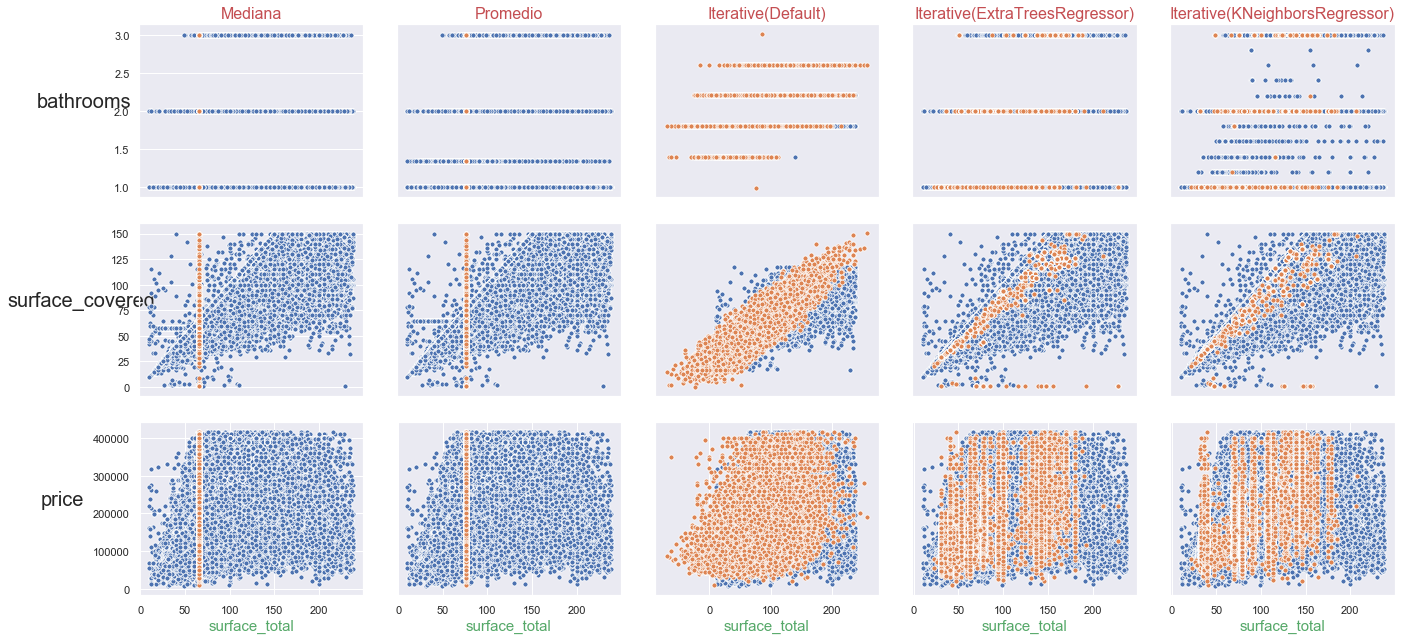

In [133]:
var_null = 'surface_total'
vars_compare = ["bathrooms", "surface_covered","price"]

impute_scatter_compare(df2, df_imputed, var_null, vars_compare)

* Luego de comparar los distintos estimadores usados en *ItertiveImputer* y observar sus resultados, puedo concluir que *KNeighborsRegressor* es el estimador que mejor se comporta para imputar los valores faltantes en `bathrooms`, `surface_total`y `surface_covered`.

* Una vez elegido el modelo para imputar los VF, realizo un GridSearchCV para obtener el mejor numero de vecinos para *KNeighborsRegressor*

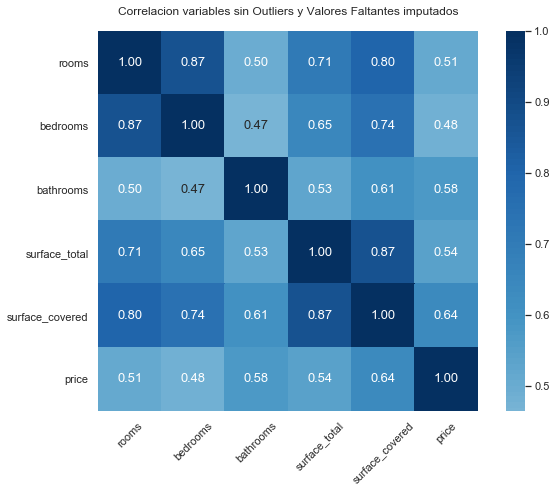

In [159]:
plt.figure(figsize=(9, 7))

corr = data_imp_itt_knn.corr()

sns.heatmap(data = corr, cbar=True, square=True, annot=True, 
            fmt= '.2f', annot_kws={'size': 13}, 
            xticklabels= corr.columns, yticklabels= corr.columns, 
            cmap='RdBu', center=0)
plt.title('Correlacion variables sin Outliers y Valores Faltantes imputados', pad=16)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [141]:
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size': np.arange(1,35),
              'algorithm':['auto', 'kd_tree']}

knn= KNeighborsRegressor()

X= data_imp_itt_knn.loc[:,["rooms", "bedrooms", "bathrooms", "surface_total", "price"]]
Y= data_imp_itt_knn.loc[:,["surface_covered"]]

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [143]:
model= GridSearchCV(knn, param_grid, cv=5)

In [144]:
model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [145]:
print(model.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                    weights='distance')
